In [1]:
import tsfresh
import os
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np
import re
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, MinimalFCParameters
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import recall_score
import lightgbm as lgbm

In [63]:
timeseries = pd.read_csv(r"C:\Users\jmusiato\OneDrive - Amgen\Documents\Thesis\csv\video5_5.csv")

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Set the path to the folder with CSV files
folder_path = r"C:\Users\jmusiato\OneDrive - Amgen\Documents\Thesis\THESIS CSV OPENFACE"

# Loop through CSV files in the folder and clean/impute data
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Load data into a pandas dataframe
        file_path = os.path.join(folder_path, filename)
        timeseries = pd.read_csv(file_path)
        
        # Dropping columns which include classification AU and leave the ones that include regression
        cols_to_drop = [col for col in timeseries.columns if col.endswith('_c')]
        cols_to_drop += [' face_id', ' timestamp', ' success', 'frame']
        df = timeseries.drop(columns=cols_to_drop)
        
        # Filter rows where 'confidence' is below 0.90 and drop them
        dropped_df = df[df[' confidence'] < 0.85]
        df = df[df[' confidence'] >= 0.85]
        
        # Perform KNN imputation
        if not df.empty:
            imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
            df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
            
            
            total_rows =  df.shape[0] + dropped_df.shape[0]
            percentage_imputed = dropped_df.shape[0]/total_rows
            if percentage_imputed > 0.1:
                print(f"{filename} had to impute {percentage_imputed*100:.2f}% of rows.")
        else:
            print(f"{filename} has no valid rows.")

video100_5.csv had to impute 11.06% of rows.
video117_4.csv had to impute 10.62% of rows.
video124_5.csv had to impute 27.43% of rows.
video125_5.csv had to impute 10.18% of rows.
video12_6.csv had to impute 14.60% of rows.
video131_6.csv had to impute 21.68% of rows.
video136_4.csv had to impute 23.01% of rows.
video137_5.csv had to impute 11.06% of rows.
video143_6.csv had to impute 10.18% of rows.
video157_5.csv had to impute 11.50% of rows.
video166_6.csv had to impute 11.95% of rows.
video167_5.csv had to impute 19.91% of rows.
video169_5.csv had to impute 26.99% of rows.
video169_6.csv had to impute 15.49% of rows.
video171_5.csv had to impute 14.16% of rows.
video176_6.csv had to impute 14.16% of rows.
video182_5.csv had to impute 58.41% of rows.
video186_6.csv has no valid rows.
video190_5.csv had to impute 14.60% of rows.
video190_6.csv had to impute 79.20% of rows.
video191_6.csv had to impute 14.16% of rows.
video195_5.csv had to impute 10.18% of rows.
video196_6.csv had to 

***THE CODE BELOW IS GOING THROUGH THE WHOLE FOLDER WITH CSV FILES AND IS IMPUTING THE VALUES IN ROWS WITH CONFIDENCE <0.85 
*** AND IT CREATES THE NEW FILE WHICH INCLUDES IMPUTED VALUES


In [118]:
import os
import pandas as pd
import numpy as np
import re
from sklearn.impute import KNNImputer

# Define the folder path containing the CSV files
folder_path =  r"C:\Users\jmusiato\OneDrive - Amgen\Documents\Thesis\THESIS CSV OPENFACE"

# Loop through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Read the CSV file and extract ID from filename
        id_num = re.search(r'video(\d+)_', filename).group(1)
        df = pd.read_csv(os.path.join(folder_path, filename))

        if len(df.columns) < 4:
            continue
        # Add ID and Frame columns
        df['ID'] = id_num
        df['Frame'] = df.index + 1

        # Impute missing values
        cols_to_impute = [col for col in df.columns if col.endswith('_r') or col == df.columns[3]]
        conf_mask = df.iloc[:, 3] < 0.85
        if conf_mask.all():
            print(f"Skipping file {filename} as all columns have less than 85% confidence")
            continue
        df.loc[conf_mask, cols_to_impute] = pd.np.nan
        imputer = KNNImputer(n_neighbors = 7)
        imputer.fit(df)
        imputed_values = pd.DataFrame(imputer.fit_transform(df[cols_to_impute]), columns = cols_to_impute)
        imputed_values = imputed_values.drop(' confidence', axis=1)
        imputed_values["ID"] = id_num
        imputed_values["Frame"] = df.index + 1

        # Save the imputed_values DataFrame to a new file
        new_filename = filename.replace(".csv", "_final_imputation.csv")
        imputed_values.to_csv(os.path.join(folder_path, new_filename), index=False)
###THIS CODE HAD TO DROp 186_6.csv file because it had zero confidence in there

C:\Users\jmusiato\AppData\Local\Temp\ipykernel_32076\4026909501.py:29: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.loc[conf_mask, cols_to_impute] = pd.np.nan
C:\Users\jmusiato\AppData\Local\Temp\ipykernel_32076\4026909501.py:29: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.loc[conf_mask, cols_to_impute] = pd.np.nan
C:\Users\jmusiato\AppData\Local\Temp\ipykernel_32076\4026909501.py:29: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.loc[conf_mask, cols_to_impute] = pd.np.nan
C:\Users\jmusiato\AppData\Local\Temp\ipykernel_32076\4026909501.py:29: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.loc[conf_mask, cols_to_impute] 

Skipping file video186_6.csv as all columns have less than 85% confidence


C:\Users\jmusiato\AppData\Local\Temp\ipykernel_32076\4026909501.py:29: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.loc[conf_mask, cols_to_impute] = pd.np.nan
C:\Users\jmusiato\AppData\Local\Temp\ipykernel_32076\4026909501.py:29: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.loc[conf_mask, cols_to_impute] = pd.np.nan
C:\Users\jmusiato\AppData\Local\Temp\ipykernel_32076\4026909501.py:29: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.loc[conf_mask, cols_to_impute] = pd.np.nan
C:\Users\jmusiato\AppData\Local\Temp\ipykernel_32076\4026909501.py:29: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.loc[conf_mask, cols_to_impute] 

*** THE CODE BELOW MERGES ALL THE CSV FILES FOR 4th TIMESTAMP (RIGHT BEFORE NEEDLE INJECTION) INTO ONE DATAFRAME AND SAVES IT IN NEW CSV FILE

In [3]:
folder_path =  r"C:\Users\jmusiato\OneDrive - Amgen\Documents\Thesis\THESIS CSV OPENFACE"
import glob
num_files = len(glob.glob(os.path.join(folder_path, "*4_final_imputation.csv")))
print(num_files)
# Create an empty list to store the dataframes
dfs = []

# Loop through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith("4_final_imputation.csv"):
        # Read the CSV file and append it to the list
        df = pd.read_csv(os.path.join(folder_path, filename))
        dfs.append(df)

# Merge all dataframes into one big dataframe
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.head
# Saving dataframe to new csv file
merged_df.to_csv(os.path.join(folder_path, "Timepoint_4_merged.csv"), index=False)

296


*** THE CODE BELOW EXTRACTS SUM OF POINTS FROM VVR QUESTIONNAIRE FILE AT TIMEPOINT 4 AND CREATES BINARY CLASSIFICATION COLUMN 'At_Risk', which returns 1 when patient 
is At_Risk (score >11 out of 40) and 1 when patient is not At_Risk (score<11 out of 40)

In [12]:
merged_df = pd.read_csv("Timepoint_4_merged.csv")


import pandas as pd
df = pd.read_csv('20221004_Time_points_final.csv', sep = ";", nrows=1989, encoding='latin1')
# Filter the dataframe to only include rows where Time_point is 4
df = df[df['Time_point'] == 4]

# Extract the columns we want (SUM and ID)
df = df[['sum', 'ID']]

# Merge the two dataframes based on the 'ID' column
merged_df = pd.merge(merged_df, df, on='ID', how='left')

# Add a new column called 'At_Risk' based on the values in the 'SUM' column
merged_df ['sum'] = merged_df ['sum'].fillna(0)  # Replace any missing values with 0
merged_df ['At_Risk'] = merged_df ['sum'].apply(lambda x: 1 if x > 11 else 0)

# Reorder the columns to have ID, SUM, and At_Risk at the beginning
merged_df = merged_df [['ID', 'sum', 'At_Risk'] + [col for col in merged_df .columns if col not in ['ID', 'sum', 'At_Risk']]]

# Reset the index of the merged_df
merged_df = merged_df.reset_index(drop=True) 

# Extract y as target variable for feature selection/extraction:
final = merged_df[['ID', 'At_Risk']].copy()

# Group by 'ID' column and select first value of 'At_Risk' for each group
y = final.groupby('ID').first().reset_index()

# Set 'ID' column as index
y.set_index('ID', inplace=True)
y = y['At_Risk'].squeeze()
y
# Drop unecessary columns:
merged_df = merged_df.drop(columns=['sum','At_Risk'])
merged_df

,ID,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Frame
0,100,0.91,0.53,0.0,0.36,0.32,0.00,0.0,0.43,0.00,0.13,0.68,1.81,0.0,0.00,0.00,2.46,0.25,1
1,100,0.31,0.29,0.0,0.12,0.59,0.69,0.0,0.71,0.38,0.44,0.23,0.60,0.0,0.00,1.84,3.29,1.46,2
2,100,0.05,0.29,0.0,0.00,0.84,0.90,0.0,0.81,0.56,0.40,0.41,0.51,0.0,0.02,1.89,2.86,1.46,3
3,100,0.30,0.57,0.0,0.00,1.11,1.02,0.0,0.92,0.62,0.36,0.80,1.07,0.0,0.02,1.18,1.71,0.68,4
4,100,0.46,0.89,0.0,0.00,1.22,0.90,0.0,0.97,0.58,0.28,1.02,1.69,0.0,0.02,0.14,0.75,0.11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66891,9,0.00,0.00,0.0,0.00,0.15,0.32,0.0,1.13,0.75,1.50,0.00,0.05,0.0,0.05,0.01,0.29,0.27,222
66892,9,0.00,0.00,0.0,0.00,0.09,0.00,0.0,1.12,0.72,1.51,0.00,0.10,0.0,0.12,0.00,0.30,0.00,223
66893,9,0.00,0.00,0.0,0.00,0.03,0.00,0.0,1.14,0.63,1.30,0.00,0.12,0.0,0.20,0.00,0.21,0.00,224
66894,9,0.00,0.00,0.0,0.00,0.01,0.00,0.0,1.13,0.63,1.23,0.00,0.12,0.0,0.34,0.00,0.18,0.00,225


In [15]:
print(type(merged_df.index))

<class 'pandas.core.indexes.range.RangeIndex'>


In [23]:
merged_df


AU01_r   AU02_r   AU04_r   AU05_r   AU06_r   AU07_r   AU09_r   
ID  Frame                                                                  
5   1         1.37     0.68     0.00     0.58     0.00     0.00     0.00  \
    2         0.96     0.56     0.00     0.22     0.14     0.00     0.10   
    3         0.50     0.33     0.00     0.03     0.26     0.00     0.23   
    4         0.06     0.00     0.00     0.00     0.47     0.00     0.37   
    5         0.00     0.00     0.00     0.00     0.52     0.00     0.33   
...            ...      ...      ...      ...      ...      ...      ...   
315 222       0.00     0.00     0.97     0.00     0.00     0.00     0.45   
    223       0.00     0.00     1.11     0.00     0.00     0.00     0.36   
    224       0.00     0.07     0.93     0.00     0.00     0.00     0.15   
    225       0.32     0.16     0.69     0.00     0.00     0.04     0.05   
    226       0.97     0.28     0.26     0.00     0.00     0.12     0.00   

            AU10_r   AU12_r   AU14_r   AU15_r   AU17_r   AU20_r   AU23_r   
ID  Frame                                                                  
5   1         0.00     0.53     0.08     0.72     0.93     0.00      0.0  \
    2         0.06     0.61     0.16     0.50     0.70     0.05      0.0   
    3         0.11     0.69     0.14     0.26     0.39     0.05      0.0   
    4         0.42     0.78     0.10     0.01     0.21     0.00      0.0   
    5         0.56     0.96     0.14     0.00     0.26     0.13      0.0   
...            ...      ...      ...      ...      ...      ...      ...   
315 222       1.66     0.02     1.97     0.00     1.01     0.00      0.0   
    223       1.39     0.00     1.40     0.04     0.90     0.00      0.0   
    224       1.52     0.00     1.01     0.36     0.66     0.18      0.0   
    225       1.35     0.00     1.17     0.52     0.39     0.18      0.0   
    226       1.10     0.00     2.42     0.48     0.26     0.00      0.0   

            AU25_r   AU26_r   AU45_r  
ID  Frame                             
5   1         0.16     0.00     0.00  
    2         0.23     0.00     0.70  
    3         0.52     0.00     0.77  
    4         1.04     0.02     0.77  
    5         1.37     0.02     0.07  
...            ...      ...      ...  
315 222       0.21     0.75     0.00  
    223       0.26     1.15     0.37  
    224       0.15     1.42     1.56  
    225       0.07     0.84     2.87  
    226       0.05     0.00     3.93  

[66896 rows x 17 columns]

In [20]:
column_names = merged_df.columns.tolist()
print(column_names)

['ID', ' AU01_r', ' AU02_r', ' AU04_r', ' AU05_r', ' AU06_r', ' AU07_r', ' AU09_r', ' AU10_r', ' AU12_r', ' AU14_r', ' AU15_r', ' AU17_r', ' AU20_r', ' AU23_r', ' AU25_r', ' AU26_r', ' AU45_r', 'Frame']


In [12]:


merged_df

,ID,Frame,index,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,100,1,0,0.91,0.53,0.0,0.36,0.32,0.00,0.0,0.43,0.00,0.13,0.68,1.81,0.0,0.00,0.00,2.46,0.25
1,100,2,1,0.31,0.29,0.0,0.12,0.59,0.69,0.0,0.71,0.38,0.44,0.23,0.60,0.0,0.00,1.84,3.29,1.46
2,100,3,2,0.05,0.29,0.0,0.00,0.84,0.90,0.0,0.81,0.56,0.40,0.41,0.51,0.0,0.02,1.89,2.86,1.46
3,100,4,3,0.30,0.57,0.0,0.00,1.11,1.02,0.0,0.92,0.62,0.36,0.80,1.07,0.0,0.02,1.18,1.71,0.68
4,100,5,4,0.46,0.89,0.0,0.00,1.22,0.90,0.0,0.97,0.58,0.28,1.02,1.69,0.0,0.02,0.14,0.75,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66891,9,222,66891,0.00,0.00,0.0,0.00,0.15,0.32,0.0,1.13,0.75,1.50,0.00,0.05,0.0,0.05,0.01,0.29,0.27
66892,9,223,66892,0.00,0.00,0.0,0.00,0.09,0.00,0.0,1.12,0.72,1.51,0.00,0.10,0.0,0.12,0.00,0.30,0.00
66893,9,224,66893,0.00,0.00,0.0,0.00,0.03,0.00,0.0,1.14,0.63,1.30,0.00,0.12,0.0,0.20,0.00,0.21,0.00
66894,9,225,66894,0.00,0.00,0.0,0.00,0.01,0.00,0.0,1.13,0.63,1.23,0.00,0.12,0.0,0.34,0.00,0.18,0.00


In [11]:
merged_df = merged_df.reindex(columns=['ID', 'Frame'] + [col for col in merged_df.columns if col not in ['ID', 'Frame']])



In [13]:
from tsfresh.utilities.dataframe_functions import impute

A = extract_features(merged_df, column_id='ID', column_sort='Frame', default_fc_parameters=ComprehensiveFCParameters(),impute_function = impute )

# convert the index to a regular column


###NOw I need to add to this huge dataframe a score indicating whether someone is at high or low risk, I have to take it from VVR scores. 

Feature Extraction: 100%|██████████| 20/20 [03:09<00:00,  9.46s/it]


In [14]:
impute(A)
A = A.dropna(axis=1)

In [15]:
# Find rows with NaN values
A =impute(A)
rows_with_nan = A[A.isna().any(axis=1)]

# Print the rows with NaN values
X_final_A = A.dropna(subset=rows_with_nan.columns)
X_final_A= pd.DataFrame(X_final_A)

In [19]:
from tsfresh.feature_extraction import MinimalFCParameters
X = extract_features(merged_df, column_id='ID', column_sort='Frame', default_fc_parameters=MinimalFCParameters(), impute_function=impute) 
impute(X)
X = X.dropna(axis=1)


Feature Extraction: 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]


TypeError: Setting a MultiIndex dtype to anything other than object is not supported

In [18]:
X

NameError: name 'X' is not defined

In [367]:
# Find rows with NaN values

rows_with_nan = X[X.isna().any(axis=1)]

# Print the rows with NaN values
X_final = X.dropna(subset=rows_with_nan.columns)
X_final_X = pd.DataFrame(X_final)


In [368]:
X_final_X

,AU01_r__sum_values,AU01_r__median,AU01_r__mean,AU01_r__length,AU01_r__standard_deviation,AU01_r__variance,AU01_r__root_mean_square,AU01_r__maximum,AU01_r__absolute_maximum,AU01_r__minimum,...,AU45_r__sum_values,AU45_r__median,AU45_r__mean,AU45_r__length,AU45_r__standard_deviation,AU45_r__variance,AU45_r__root_mean_square,AU45_r__maximum,AU45_r__absolute_maximum,AU45_r__minimum
5,49.410000,0.030,0.218628,226.0,0.420439,0.176769,0.473886,2.09,2.09,0.0,...,110.150000,0.115,0.487389,226.0,0.657517,0.432329,0.818460,3.36,3.36,0.0
6,31.498117,0.060,0.139372,226.0,0.236523,0.055943,0.274532,1.61,1.61,0.0,...,66.715605,0.095,0.295202,226.0,0.435037,0.189257,0.525739,1.89,1.89,0.0
7,40.010000,0.030,0.177035,226.0,0.260550,0.067886,0.315005,1.12,1.12,0.0,...,110.300000,0.140,0.488053,226.0,0.789118,0.622707,0.927848,3.79,3.79,0.0
8,37.376143,0.050,0.165381,226.0,0.219689,0.048263,0.274981,1.07,1.07,0.0,...,92.264753,0.035,0.408251,226.0,0.619183,0.383388,0.741658,2.86,2.86,0.0
9,87.582601,0.025,0.387534,226.0,0.536291,0.287608,0.661657,1.94,1.94,0.0,...,137.596502,0.070,0.608834,226.0,0.924400,0.854515,1.106885,3.27,3.27,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,61.221786,0.075,0.270893,226.0,0.379672,0.144151,0.466405,1.84,1.84,0.0,...,45.946607,0.060,0.203304,226.0,0.291174,0.084782,0.355126,1.53,1.53,0.0
312,50.613956,0.030,0.223956,226.0,0.353384,0.124880,0.418374,1.93,1.93,0.0,...,44.054933,0.045,0.194933,226.0,0.255069,0.065060,0.321028,1.05,1.05,0.0
313,23.785740,0.050,0.105247,226.0,0.157471,0.024797,0.189404,0.81,0.81,0.0,...,44.399372,0.040,0.196457,226.0,0.307059,0.094285,0.364528,2.01,2.01,0.0
314,95.555625,0.060,0.422813,226.0,0.739458,0.546799,0.851804,3.62,3.62,0.0,...,100.802054,0.120,0.446027,226.0,0.645741,0.416981,0.784806,2.71,2.71,0.0


In [28]:

counts = y.value_counts()
print(counts)

0    197
1     99
Name: At_Risk, dtype: int64


In [19]:
X_final_A

,AU01_r__variance_larger_than_standard_deviation,AU01_r__has_duplicate_max,AU01_r__has_duplicate_min,AU01_r__has_duplicate,AU01_r__sum_values,AU01_r__abs_energy,AU01_r__mean_abs_change,AU01_r__mean_change,AU01_r__mean_second_derivative_central,AU01_r__median,...,AU45_r__fourier_entropy__bins_5,AU45_r__fourier_entropy__bins_10,AU45_r__fourier_entropy__bins_100,AU45_r__permutation_entropy__dimension_3__tau_1,AU45_r__permutation_entropy__dimension_4__tau_1,AU45_r__permutation_entropy__dimension_5__tau_1,AU45_r__permutation_entropy__dimension_6__tau_1,AU45_r__permutation_entropy__dimension_7__tau_1,AU45_r__query_similarity_count__query_None__threshold_0.0,AU45_r__mean_n_absolute_max__number_of_maxima_7
5,0.0,0.0,1.0,1.0,49.410000,50.752300,0.067511,-0.005111,0.001116,0.030,...,0.409497,0.626468,1.784265,1.313551,2.042342,2.760608,3.401217,3.943127,0.0,2.745714
6,0.0,0.0,1.0,1.0,31.498117,17.033074,0.071300,0.000000,-0.000335,0.060,...,0.176326,0.339216,1.687363,1.220114,1.919478,2.655668,3.382940,4.022439,0.0,1.655714
7,0.0,0.0,1.0,1.0,40.010000,22.425500,0.041244,0.000000,0.000000,0.030,...,0.543464,0.874878,2.310347,1.309563,2.051554,2.705734,3.286972,3.772337,0.0,3.255714
8,0.0,0.0,1.0,1.0,37.376143,17.088853,0.067870,0.000000,0.000000,0.050,...,0.251853,0.429449,1.294333,1.233295,1.903498,2.571655,3.173139,3.669866,0.0,2.420000
9,0.0,0.0,1.0,1.0,87.582601,98.940547,0.071711,0.000000,0.000000,0.025,...,0.267548,0.451396,1.800102,1.275372,2.019611,2.670193,3.222403,3.629671,0.0,3.135714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,0.0,0.0,1.0,1.0,61.221786,49.162566,0.086630,0.005289,0.001496,0.075,...,0.600234,0.996991,1.936390,1.317020,2.146353,2.859301,3.460198,3.910429,0.0,1.164286
312,0.0,0.0,1.0,1.0,50.613956,39.558256,0.071502,-0.008267,0.002768,0.030,...,0.409497,0.594702,1.499132,1.233244,1.924696,2.534080,3.026730,3.395232,0.0,0.961429
313,0.0,0.0,1.0,1.0,23.785740,8.107531,0.043871,0.000578,0.000357,0.050,...,0.439979,0.746462,2.086328,1.230486,1.957573,2.623194,3.141370,3.497105,0.0,1.390000
314,0.0,0.0,1.0,1.0,95.555625,163.978641,0.110806,0.000000,-0.000469,0.060,...,0.409497,0.647200,1.608387,1.317163,2.067614,2.722951,3.291063,3.761096,0.0,2.620000


In [344]:

X_filtered = select_features(X_final_X, y, fdr_level=0.2-0.3, hypotheses_independent=False)
X_filtered

,AU14_r__median,AU14_r__sum_values,AU14_r__mean,AU14_r__root_mean_square,AU14_r__maximum,AU14_r__absolute_maximum,AU14_r__standard_deviation,AU14_r__variance
5,0.545,133.950000,0.592699,0.709848,2.58,2.58,0.390629,0.152591
6,0.380,87.734619,0.388206,0.518939,1.58,1.58,0.344374,0.118593
7,0.750,171.840000,0.760354,0.906550,1.88,1.88,0.493655,0.243695
8,0.820,205.366099,0.908700,1.117630,2.59,2.59,0.650662,0.423362
9,1.205,260.903318,1.154439,1.219900,1.79,1.79,0.394240,0.155425
...,...,...,...,...,...,...,...,...
311,0.000,22.751339,0.100670,0.314933,1.44,1.44,0.298410,0.089049
312,1.340,331.697689,1.467689,1.616440,3.71,3.71,0.677323,0.458766
313,0.000,16.448341,0.072780,0.258102,1.65,1.65,0.247628,0.061320
314,1.645,346.738482,1.534241,1.833035,4.03,4.03,1.003056,1.006121


In [17]:
X_filtered = select_features(X_final_A, y,ml_task = 'classification', fdr_level=0.275, hypotheses_independent=False)


In [27]:
X_filtered

,"AU14_r__fft_coefficient__attr_""abs""__coeff_78",AU14_r__mean_abs_change,"AU14_r__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0",AU14_r__absolute_sum_of_changes,"AU14_r__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","AU14_r__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.2","AU14_r__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2","AU14_r__fft_coefficient__attr_""abs""__coeff_91",AU14_r__quantile__q_0.3,"AU14_r__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.0",...,"AU14_r__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","AU15_r__fft_coefficient__attr_""abs""__coeff_31",AU14_r__number_crossing_m__m_1,"AU14_r__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.4",AU14_r__ratio_value_number_to_time_series_length,"AU14_r__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2",AU14_r__c3__lag_2,"AU14_r__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.0",AU14_r__c3__lag_3,AU14_r__c3__lag_1
5,0.237022,0.083333,0.083333,18.750000,0.070880,0.084059,0.054138,0.347805,0.410,0.003454,...,0.008719,0.406228,6.0,0.083254,0.384956,0.006751,0.513905,0.003684,0.434097,0.588421
6,0.273014,0.093644,0.093644,21.070000,0.043529,0.093644,0.013375,0.931645,0.125,0.004801,...,0.013316,3.803824,4.0,0.125069,0.362832,0.006673,0.161579,0.008144,0.128414,0.204318
7,0.629663,0.093733,0.093733,21.090000,0.085873,0.102416,0.109677,1.100044,0.570,0.008824,...,0.016926,1.947515,10.0,0.089268,0.491150,0.019290,0.954741,0.008045,0.913808,0.993110
8,0.992951,0.166910,0.166910,37.554798,0.148809,0.160838,0.087917,0.820054,0.510,0.028842,...,0.049378,2.602021,22.0,0.152986,0.592920,0.024887,1.626097,0.026548,1.386287,1.941850
9,0.307705,0.102311,0.102311,23.020000,0.107697,0.090904,0.061875,1.128801,0.925,0.007362,...,0.020030,3.503069,19.0,0.086343,0.495575,0.012996,1.951279,0.008262,1.895384,2.011639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,0.186056,0.028800,0.028800,6.480000,0.000000,0.028800,0.000000,0.514703,0.000,0.000000,...,0.000000,4.972646,4.0,0.028800,0.137168,0.000000,0.075926,0.000000,0.052472,0.100708
312,0.295670,0.176602,0.176602,39.735378,0.124344,0.184008,0.079524,1.409625,1.140,0.008970,...,0.027746,2.253309,18.0,0.201707,0.615044,0.015883,4.879349,0.009770,4.465782,5.284922
313,0.215621,0.028716,0.028716,6.461121,0.000000,0.028716,0.000000,0.106510,0.000,0.000000,...,0.000067,0.980486,2.0,0.028716,0.150442,0.000000,0.052549,0.000064,0.031420,0.072722
314,0.945532,0.221467,0.221467,49.830000,0.207795,0.233638,0.225937,2.217608,0.765,0.043956,...,0.074207,5.593510,12.0,0.217668,0.699115,0.078647,6.835567,0.038173,6.283238,7.608953


In [35]:
y.to_csv('y_4.csv', index=False)

*** CODE BELOWS TRAINS AND TEST ON COMPREHENSIVE FEATURES WITH FDR = 0.2

In [137]:
import pandas as pd
from sklearn.decomposition import KernelPCA
# assuming X is your original dataset
# create a KernelPCA instance
kpca = KernelPCA(n_components=2, kernel='rbf')

# fit the data to the model and transform X
X_transformed = kpca.fit_transform(X_final_A)

# create a new dataframe with the transformed features
df_transformed = pd.DataFrame(X_transformed, columns=['PC1', 'PC2'])
df_transformed


,PC1,PC2
0,0.018477,0.000045
1,0.026355,0.036081
2,0.159602,-0.083653
3,0.022648,0.016074
4,0.000897,0.039550
...,...,...
291,0.000692,-0.012376
292,0.000948,0.003611
293,0.011581,0.007003
294,0.007016,0.015999


In [108]:
X_filtered = X_filtered.sort_index(axis=1)
X_filtered

,"AU04_r__fft_coefficient__attr_""angle""__coeff_59","AU07_r__fft_coefficient__attr_""angle""__coeff_83",AU14_r__abs_energy,AU14_r__absolute_sum_of_changes,AU14_r__ar_coefficient__coeff_0__k_10,AU14_r__c3__lag_1,AU14_r__c3__lag_2,AU14_r__c3__lag_3,"AU14_r__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.0","AU14_r__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2",...,AU14_r__quantile__q_0.7,AU14_r__range_count__max_1__min_-1,AU14_r__ratio_value_number_to_time_series_length,AU14_r__root_mean_square,AU14_r__sum_of_reoccurring_data_points,AU14_r__sum_of_reoccurring_values,AU14_r__sum_values,"AU15_r__fft_coefficient__attr_""abs""__coeff_31","AU15_r__fft_coefficient__attr_""abs""__coeff_38","AU15_r__fft_coefficient__attr_""abs""__coeff_45"
5,169.316047,-138.182811,113.877700,18.750000,0.033560,0.588421,0.513905,0.434097,0.070241,0.054138,...,0.700,212.0,0.384956,0.709848,107.530000,34.390000,133.950000,0.406228,2.522612,1.314294
6,107.576070,160.535940,60.861212,21.070000,0.036552,0.204318,0.161579,0.128414,0.013375,0.013375,...,0.545,216.0,0.362832,0.518939,59.284619,21.038206,87.734619,3.803824,8.722162,2.984711
7,151.605407,132.771140,185.734400,21.090000,0.017469,0.993110,0.954741,0.913808,0.080256,0.109677,...,0.960,165.0,0.491150,0.906550,114.150000,43.580000,171.840000,1.947515,3.335476,1.136579
8,80.657106,-155.857090,282.295805,37.554798,0.045886,1.941850,1.626097,1.386287,0.124231,0.087917,...,1.055,150.0,0.592920,1.117630,112.756099,48.328700,205.366099,2.602021,2.688061,0.618852
9,0.000000,-11.377526,336.323191,23.020000,0.077794,2.011639,1.951279,1.895384,0.104819,0.061875,...,1.430,81.0,0.495575,1.219900,212.483318,74.174439,260.903318,3.503069,4.844013,3.416085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,-105.009071,147.241254,22.415369,6.480000,0.005939,0.100708,0.075926,0.052472,0.000000,0.000000,...,0.000,214.0,0.137168,0.314933,5.451339,2.620670,22.751339,4.972646,1.813941,3.241846
312,-134.079384,-10.198063,590.510211,39.735378,0.122253,5.284922,4.879349,4.465782,0.132533,0.079524,...,1.590,46.0,0.615044,1.616440,189.730000,74.580000,331.697689,2.253309,2.839125,3.175889
313,-5.638928,-163.058566,15.055391,6.461121,0.004707,0.072722,0.052549,0.031420,0.000000,0.000000,...,0.000,219.0,0.150442,0.258102,3.328341,1.232780,16.448341,0.980486,1.489900,3.954387
314,79.093798,-52.185709,759.363691,49.830000,0.078529,7.608953,6.835567,6.283238,0.183214,0.225937,...,2.240,76.0,0.699115,1.833035,166.288482,68.614241,346.738482,5.593510,4.671297,3.061024


In [105]:
X_top = X_top.sort_index(axis=1)
X_top

,"AU01_r__fft_coefficient__attr_""angle""__coeff_44","AU01_r__fft_coefficient__attr_""real""__coeff_10","AU02_r__fft_coefficient__attr_""imag""__coeff_44","AU04_r__fft_coefficient__attr_""imag""__coeff_44","AU04_r__fft_coefficient__attr_""imag""__coeff_53","AU05_r__cwt_coefficients__coeff_8__w_5__widths_(2, 5, 10, 20)","AU05_r__fft_coefficient__attr_""real""__coeff_33","AU05_r__fft_coefficient__attr_""real""__coeff_56","AU05_r__fft_coefficient__attr_""real""__coeff_90","AU06_r__fft_coefficient__attr_""abs""__coeff_17",...,"AU20_r__fft_coefficient__attr_""abs""__coeff_78",AU23_r__ar_coefficient__coeff_8__k_10,"AU23_r__cwt_coefficients__coeff_3__w_2__widths_(2, 5, 10, 20)","AU23_r__fft_coefficient__attr_""angle""__coeff_70","AU25_r__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.4","AU25_r__fft_coefficient__attr_""imag""__coeff_4","AU26_r__cwt_coefficients__coeff_10__w_5__widths_(2, 5, 10, 20)","AU26_r__fft_coefficient__attr_""real""__coeff_15","AU45_r__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4","AU45_r__fft_coefficient__attr_""imag""__coeff_89"
0,-80.353386,15.686401,-3.159250,0.039229,0.093630,-0.955794,2.988779,0.396744,0.613496,3.972890,...,0.158458,-0.020474,0.000000,65.250699,-0.001944,-0.746595,-0.057127,-6.207053,0.154788,-2.095209
1,-67.641148,-4.828550,0.003482,0.510658,1.293273,0.000000,-0.534506,0.002558,-0.454534,2.320368,...,1.223912,0.039434,0.000000,97.408131,-0.019342,0.597283,0.000000,11.619123,0.034767,0.322927
2,153.810024,4.380909,0.868526,-0.093392,1.057694,-0.070417,-2.402286,-0.072052,0.096708,5.092540,...,0.430234,-0.166339,1.072516,-44.251906,-0.009000,-17.902147,1.396438,-6.425219,0.189214,0.122015
3,115.558949,-8.674540,1.588625,0.264343,0.136708,-0.040472,-0.779769,-0.157018,-0.204807,3.155209,...,0.468973,0.052604,-0.070270,-154.809922,0.009041,-27.215177,0.572739,-0.950857,0.070390,0.143214
4,-58.588087,5.589652,0.286615,0.000000,0.000000,0.000000,-0.516398,-0.717547,0.136729,2.224241,...,0.879679,0.199008,0.000000,130.442250,0.000795,-12.277906,-0.000017,2.294016,0.114840,-0.931640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,-130.043607,-2.644699,0.290301,-0.304643,0.730084,-0.074760,-2.081844,2.147695,-0.324772,5.857934,...,0.119153,-0.302756,0.532884,-133.059982,-0.002973,56.813526,-0.176423,-4.354923,0.023711,0.266406
292,-43.953351,-9.423592,-1.454987,-0.397278,-0.212762,-0.032361,-1.704031,0.078826,0.462538,17.112400,...,0.584066,-0.243118,1.923816,-160.476549,-0.008904,-3.328632,1.139355,1.822245,0.013391,-0.646387
293,-126.486419,5.123936,-1.577363,0.059484,-0.001942,0.156904,-1.275547,0.308538,0.194545,4.779389,...,0.058912,-0.083758,-0.002573,56.606844,-0.000708,19.484407,-1.286249,6.751582,0.030459,1.126146
294,-3.302531,-18.482607,-0.340396,1.164766,-0.577298,0.353033,-4.042194,-0.043623,0.040012,7.173756,...,0.238534,-0.074187,0.311631,9.285510,-0.010255,7.665452,0.325956,11.115503,0.109904,-0.629741


In [3]:
X_filtered = pd.read_csv('X_filtered_4.csv')
y = pd.read_csv('y_4.csv')

In [6]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [148]:
from sklearn.metrics import recall_score

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

X = X_filtered
#X = X_top
y = y

# Splitting data into training, validation, and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42, stratify=y_trainval)

# Standardizing data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

# Handling data imbalance using BorderlineSMOTE
#smote = BorderlineSMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(X_train_std, y_train)

In [17]:
pip install --upgrade scikit-learn imbalanced-learn


     ---------------------------------------- 8.3/8.3 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\jmusiato\\AppData\\Local\\anaconda3\\Lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [5]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)

In [6]:

# Separating features and target variable
X = X_filtered
#X = X_top
y = y




# Splitting data into training, validation, and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42, stratify=y_trainval)

# Standardizing data
#Try Min-Max Normalization
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

# Handling data imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_std, y_train)

#Try to use F1 instead or precision recall score 
scoring = make_scorer(recall_score)

#Try RF without standardization, it can yield different results
# Random Forest Classifier with grid search cross-validation
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [50, 100, 200,500],
                 'max_depth': [5, 10, 20, None],
                 'bootstrap': [True, False]}
rf_gs = GridSearchCV(rf, param_grid_rf, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring=scoring)
rf_gs.fit(X_train_smote, y_train_smote)
print("Random Forest Classifier Best Parameters: ", rf_gs.best_params_)

# Non-Linear SVM Classifier with grid search cross-validation
svm = SVC(kernel='rbf', random_state=42)
param_grid_svm = {'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.1, 1, 10],
        'coef0': [0.0, 0.5, 1.0],
        'degree': [2, 3, 4]}
svm_gs = GridSearchCV(svm, param_grid_svm, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring=scoring)
svm_gs.fit(X_train_smote, y_train_smote)
print("Non-Linear SVM Classifier Best Parameters: ", svm_gs.best_params_)

# Linear SVM Classifier with grid search cross-validation
linear_svm = LinearSVC(random_state=42)
param_grid_linear_svm = {'C': [0.1, 1, 10],
        'loss': ['hinge', 'squared_hinge']}
linear_svm_gs = GridSearchCV(linear_svm, param_grid_linear_svm, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring=scoring)
linear_svm_gs.fit(X_train_smote, y_train_smote)
print("Linear SVM Classifier Best Parameters: ", linear_svm_gs.best_params_)



# LightGBM Classifier with grid search cross-validation
lgbm_clf = lgbm.LGBMClassifier(random_state=42)
param_grid_lgbm = {'n_estimators': [50, 100, 200],
                   'max_depth': [5, 10, 20, None],
                   'learning_rate': [0.01, 0.1, 0.5],
                   'num_leaves': [31, 50, 100, 200]}
lgbm_gs = GridSearchCV(lgbm_clf, param_grid_lgbm, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring=scoring)
lgbm_gs.fit(X_train_smote, y_train_smote)
print("LightGBM Classifier Best Parameters: ", lgbm_gs.best_params_)

# Making predictions on validation data using best hyperparameters
y_pred_rf = rf_gs.predict(X_val_std)
y_pred_svm = svm_gs.predict(X_val_std)
y_pred_lgbm = lgbm_gs.predict(X_val_std)
y_pred_linear_svm = linear_svm_gs.predict(X_val_std)

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=rf_gs.best_params_['n_estimators'], max_depth=rf_gs.best_params_['max_depth'],
                             bootstrap =rf_gs.best_params_['bootstrap'], random_state=42)
rf_clf.fit(X_train_smote, y_train_smote)

# Non-Linear SVM Classifier
svm_clf = SVC(C=svm_gs.best_params_['C'], gamma=svm_gs.best_params_['gamma'],coef0=svm_gs.best_params_['coef0'], degree=svm_gs.best_params_['degree'],
              kernel='rbf', random_state=42)
svm_clf.fit(X_train_smote, y_train_smote)

#Linear SVM Classifier
linear_svm_clf = LinearSVC(C=linear_svm_gs.best_params_['C'], loss=linear_svm_gs.best_params_['loss'],
               random_state=42)
linear_svm_clf.fit(X_train_smote, y_train_smote)

# LightGBM Classifier
lgbm_clf = lgbm.LGBMClassifier(n_estimators=lgbm_gs.best_params_['n_estimators'], max_depth=lgbm_gs.best_params_['max_depth'], 
                               learning_rate =lgbm_gs.best_params_['learning_rate'], num_leaves =lgbm_gs.best_params_['num_leaves'],   random_state=42)
lgbm_clf.fit(X_train_smote, y_train_smote)



C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selec

Random Forest Classifier Best Parameters:  {'bootstrap': True, 'max_depth': 10, 'n_estimators': 100}


C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when 

Non-Linear SVM Classifier Best Parameters:  {'C': 10, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale'}


C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the n

Linear SVM Classifier Best Parameters:  {'C': 0.1, 'loss': 'hinge'}


C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarnin

LightGBM Classifier Best Parameters:  {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}


C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed 

LGBMClassifier(learning_rate=0.5, max_depth=10, random_state=42)

In [ ]:
TRAINING SET EVALUATION

In [7]:
# Making predictions on training data using best hyperparameters
y_pred_rf = rf_clf.predict(X_train_std)
y_pred_svm = svm_clf.predict(X_train_std)
y_pred_lgbm = lgbm_clf.predict(X_train_std)
y_pred_linear_svm = linear_svm_gs.predict(X_train_std)

# Evaluating performance on training data
print("Random Forest Classifier Precision on Training Data: ", precision_score(y_train, y_pred_rf))
print("Random Forest Classifier Recall on Training Data: ", recall_score(y_train, y_pred_rf))
print("Random Forest Classifier F1-score on Training Data: ", f1_score(y_train, y_pred_rf))
print("Random Forest Classifier ROC AUC on Training Data: ", roc_auc_score(y_train, rf_clf.predict_proba(X_train_std)[:, 1]))
print("Random Forest Classifier PR AUC on Training Data: ", average_precision_score(y_train, rf_clf.predict_proba(X_train_std)[:, 1]))
print("Random Forest Classifier Matthews Coefficient on Training Data: ", matthews_corrcoef(y_train, y_pred_rf))

print("Non-Linear SVM Classifier Precision on Training Data: ", precision_score(y_train, y_pred_svm))
print("Non-Linear SVM Classifier Recall on Training Data: ", recall_score(y_train, y_pred_svm))
print("Non-Linear SVM Classifier F1-score on Training Data: ", f1_score(y_train, y_pred_svm))
print("Non-Linear SVM Classifier ROC AUC on Training Data: ", roc_auc_score(y_train, svm_clf.decision_function(X_train_std)))
print("Non-Linear SVM Classifier PR AUC on Training Data: ", average_precision_score(y_train, svm_clf.decision_function(X_train_std)))
print("Non-Linear SVM Classifier Matthews Coefficient on Training Data: ", matthews_corrcoef(y_train, y_pred_svm))

print("Linear SVM Classifier Precision on Training Data: ", precision_score(y_train, y_pred_linear_svm))
print("Linear SVM Classifier Recall on Training Data: ", recall_score(y_train, y_pred_linear_svm))
print("Linear SVM Classifier F1-score on Training Data: ", f1_score(y_train, y_pred_linear_svm))
print("Linear SVM Classifier ROC AUC on Training Data: ", roc_auc_score(y_train, linear_svm_clf.decision_function(X_train_std)))
print("Linear SVM Classifier PR AUC on Training Data: ", average_precision_score(y_train, linear_svm_clf.decision_function(X_train_std)))
print("Linear SVM Classifier Matthews Coefficient on Training Data: ", matthews_corrcoef(y_train, y_pred_linear_svm))

print("LightGBM Classifier Precision on Training Data: ", precision_score(y_train, y_pred_lgbm))
print("LightGBM Classifier Recall on Training Data: ", recall_score(y_train, y_pred_lgbm))
print("LightGBM Classifier F1-score on Training Data: ", f1_score(y_train, y_pred_lgbm))
print("LightGBM Classifier ROC AUC on Training Data: ", roc_auc_score(y_train, lgbm_clf.predict_proba(X_train_std)[:, 1]))
print("LightGBM Classifier PR AUC on Training Data: ", average_precision_score(y_train, lgbm_clf.predict_proba(X_train_std)[:, 1]))
print("LightGBM Classifier Matthews Coefficient on Training Data: ", matthews_corrcoef(y_train, y_pred_lgbm))

Random Forest Classifier Precision on Training Data:  1.0
Random Forest Classifier Recall on Training Data:  1.0
Random Forest Classifier F1-score on Training Data:  1.0
Random Forest Classifier ROC AUC on Training Data:  1.0
Random Forest Classifier PR AUC on Training Data:  0.9999999999999996
Random Forest Classifier Matthews Coefficient on Training Data:  1.0
Non-Linear SVM Classifier Precision on Training Data:  0.8108108108108109
Non-Linear SVM Classifier Recall on Training Data:  0.9523809523809523
Non-Linear SVM Classifier F1-score on Training Data:  0.8759124087591241
Non-Linear SVM Classifier ROC AUC on Training Data:  0.9847619047619047
Non-Linear SVM Classifier PR AUC on Training Data:  0.9743316710334173
Non-Linear SVM Classifier Matthews Coefficient on Training Data:  0.8119573099427149
Linear SVM Classifier Precision on Training Data:  0.6190476190476191
Linear SVM Classifier Recall on Training Data:  0.8253968253968254
Linear SVM Classifier F1-score on Training Data:  0.

VALIDATION SET EVALAUTION

In [36]:
X

,"AU14_r__fft_coefficient__attr_""abs""__coeff_78",AU14_r__mean_abs_change,"AU14_r__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0",AU14_r__absolute_sum_of_changes,"AU14_r__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","AU14_r__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.2","AU14_r__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2","AU14_r__fft_coefficient__attr_""abs""__coeff_91",AU14_r__quantile__q_0.3,"AU14_r__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.0",...,"AU14_r__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","AU15_r__fft_coefficient__attr_""abs""__coeff_31",AU14_r__number_crossing_m__m_1,"AU14_r__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.4",AU14_r__ratio_value_number_to_time_series_length,"AU14_r__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2",AU14_r__c3__lag_2,"AU14_r__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.0",AU14_r__c3__lag_3,AU14_r__c3__lag_1
0,0.237022,0.083333,0.083333,18.750000,0.070880,0.084059,0.054138,0.347805,0.410,0.003454,...,0.008719,0.406228,6.0,0.083254,0.384956,0.006751,0.513905,0.003684,0.434097,0.588421
1,0.273014,0.093644,0.093644,21.070000,0.043529,0.093644,0.013375,0.931645,0.125,0.004801,...,0.013316,3.803824,4.0,0.125069,0.362832,0.006673,0.161579,0.008144,0.128414,0.204318
2,0.629663,0.093733,0.093733,21.090000,0.085873,0.102416,0.109677,1.100044,0.570,0.008824,...,0.016926,1.947515,10.0,0.089268,0.491150,0.019290,0.954741,0.008045,0.913808,0.993110
3,0.992951,0.166910,0.166910,37.554798,0.148809,0.160838,0.087917,0.820054,0.510,0.028842,...,0.049378,2.602021,22.0,0.152986,0.592920,0.024887,1.626097,0.026548,1.386287,1.941850
4,0.307705,0.102311,0.102311,23.020000,0.107697,0.090904,0.061875,1.128801,0.925,0.007362,...,0.020030,3.503069,19.0,0.086343,0.495575,0.012996,1.951279,0.008262,1.895384,2.011639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.186056,0.028800,0.028800,6.480000,0.000000,0.028800,0.000000,0.514703,0.000,0.000000,...,0.000000,4.972646,4.0,0.028800,0.137168,0.000000,0.075926,0.000000,0.052472,0.100708
292,0.295670,0.176602,0.176602,39.735378,0.124344,0.184008,0.079524,1.409625,1.140,0.008970,...,0.027746,2.253309,18.0,0.201707,0.615044,0.015883,4.879349,0.009770,4.465782,5.284922
293,0.215621,0.028716,0.028716,6.461121,0.000000,0.028716,0.000000,0.106510,0.000,0.000000,...,0.000067,0.980486,2.0,0.028716,0.150442,0.000000,0.052549,0.000064,0.031420,0.072722
294,0.945532,0.221467,0.221467,49.830000,0.207795,0.233638,0.225937,2.217608,0.765,0.043956,...,0.074207,5.593510,12.0,0.217668,0.699115,0.078647,6.835567,0.038173,6.283238,7.608953


In [9]:
# Making predictions on validation data using best hyperparameters
y_pred_rf = rf_clf.predict(X_val_std)
y_pred_svm = svm_clf.predict(X_val_std)
y_pred_lgbm = lgbm_clf.predict(X_val_std)
y_pred_linear_svm = linear_svm_gs.predict(X_val_std)

# Evaluating performance on validation data
print("Random Forest Classifier Precision on Validation Data: ", precision_score(y_val, y_pred_rf))
print("Random Forest Classifier Recall on Validation Data: ", recall_score(y_val, y_pred_rf))
print("Random Forest Classifier F1-score on Validation Data: ", f1_score(y_val, y_pred_rf))
print("Random Forest Classifier ROC AUC on Validation Data: ", roc_auc_score(y_val, rf_clf.predict_proba(X_val_std)[:, 1]))
print("Random Forest Classifier PR AUC on Validation Data: ", average_precision_score(y_val, rf_clf.predict_proba(X_val_std)[:, 1]))
print("Random Forest Classifier Matthews Coefficient on Validation Data: ", matthews_corrcoef(y_val, y_pred_rf))

print("Non-Linear SVM Classifier Precision on Validation Data: ", precision_score(y_val, y_pred_svm))
print("Non-Linear SVM Classifier Recall on Validation Data: ", recall_score(y_val, y_pred_svm))
print("Non-Linear SVM Classifier F1-score on Validation Data: ", f1_score(y_val, y_pred_svm))
print("Non-Linear SVM Classifier ROC AUC on Validation Data: ", roc_auc_score(y_val, svm_clf.decision_function(X_val_std)))
print("Non-Linear SVM Classifier PR AUC on Validation Data: ", average_precision_score(y_val, svm_clf.decision_function(X_val_std)))
print("Non-Linear SVM Classifier Matthews Coefficient on Validation Data: ", matthews_corrcoef(y_val, y_pred_svm))

print("Linear SVM Classifier Precision on Validation Data: ", precision_score(y_val, y_pred_linear_svm))
print("Linear SVM Classifier Recall on Validation Data: ", recall_score(y_val, y_pred_linear_svm))
print("Linear SVM Classifier F1-score on Validation Data: ", f1_score(y_val, y_pred_linear_svm))
print("Linear SVM Classifier ROC AUC on Validation Data: ", roc_auc_score(y_val, linear_svm_clf.decision_function(X_val_std)))
print("Linear SVM Classifier PR AUC on Validation Data: ", average_precision_score(y_val, linear_svm_clf.decision_function(X_val_std)))
print("Linear SVM Classifier Matthews Coefficient on Validation Data: ", matthews_corrcoef(y_val, y_pred_linear_svm))

print("LightGBM Classifier Precision on Validation Data: ", precision_score(y_val, y_pred_lgbm))
print("LightGBM Classifier Recall on Validation Data: ", recall_score(y_val, y_pred_lgbm))
print("LightGBM Classifier F1-score on Validation Data: ", f1_score(y_val, y_pred_lgbm))
print("LightGBM Classifier ROC AUC on Validation Data: ", roc_auc_score(y_val, lgbm_clf.predict_proba(X_val_std)[:, 1]))
print("LightGBM Classifier PR AUC on Validation Data: ", average_precision_score(y_val, lgbm_clf.predict_proba(X_val_std)[:, 1]))
print("LightGBM Classifier Matthews Coefficient on Validation Data: ", matthews_corrcoef(y_val, y_pred_lgbm))


Random Forest Classifier Precision on Validation Data:  0.7058823529411765
Random Forest Classifier Recall on Validation Data:  0.75
Random Forest Classifier F1-score on Validation Data:  0.7272727272727272
Random Forest Classifier ROC AUC on Validation Data:  0.890625
Random Forest Classifier PR AUC on Validation Data:  0.7783501005179229
Random Forest Classifier Matthews Coefficient on Validation Data:  0.5852390484520126
Non-Linear SVM Classifier Precision on Validation Data:  0.5454545454545454
Non-Linear SVM Classifier Recall on Validation Data:  0.75
Non-Linear SVM Classifier F1-score on Validation Data:  0.631578947368421
Non-Linear SVM Classifier ROC AUC on Validation Data:  0.84375
Non-Linear SVM Classifier PR AUC on Validation Data:  0.7825064865689866
Non-Linear SVM Classifier Matthews Coefficient on Validation Data:  0.4139186771923578
Linear SVM Classifier Precision on Validation Data:  0.6363636363636364
Linear SVM Classifier Recall on Validation Data:  0.875
Linear SVM C

In [143]:
from sklearn.metrics import matthews_corrcoef

TEST SET EVALAUTION

In [10]:

# Making predictions on validation data using best hyperparameters
y_pred_rf = rf_clf.predict(X_test_std)
y_pred_svm = svm_clf.predict(X_test_std)
y_pred_lgbm = lgbm_clf.predict(X_test_std)
y_pred_linear_svm = linear_svm_gs.predict(X_test_std)
# Evaluating performance on validation data
print("Random Forest Classifier Precision on Validation Data: ", precision_score(y_test, y_pred_rf))
print("Random Forest Classifier Recall on Validation Data: ", recall_score(y_test, y_pred_rf))
print("Random Forest Classifier F1-score on Validation Data: ", f1_score(y_test, y_pred_rf))
print("Random Forest Classifier ROC AUC on Validation Data: ", roc_auc_score(y_test, rf_clf.predict_proba(X_test_std)[:, 1]))
print("Random Forest Classifier PR AUC on Validation Data: ", average_precision_score(y_test, rf_clf.predict_proba(X_test_std)[:, 1]))
print("Random Forest Classifier Matthews Coefficient on Validation Data: ", matthews_corrcoef(y_test, y_pred_rf))

print("Non-Linear SVM Classifier Precision on Validation Data: ", precision_score(y_test, y_pred_svm))
print("Non-Linear SVM Classifier Recall on Validation Data: ", recall_score(y_test, y_pred_svm))
print("Non-Linear SVM Classifier F1-score on Validation Data: ", f1_score(y_test, y_pred_svm))
print("Non-Linear SVM Classifier ROC AUC on Validation Data: ", roc_auc_score(y_test, svm_clf.decision_function(X_test_std)))
print("Non-Linear SVM Classifier PR AUC on Validation Data: ", average_precision_score(y_test, svm_clf.decision_function(X_test_std)))
print("Non-Linear SVM Classifier Matthews Coefficient on Validation Data: ", matthews_corrcoef(y_test, y_pred_svm))

print("Linear SVM Classifier Precision on Validation Data: ", precision_score(y_test, y_pred_linear_svm))
print("Linear SVM Classifier Recall on Validation Data: ", recall_score(y_test, y_pred_linear_svm))
print("Linear SVM Classifier F1-score on Validation Data: ", f1_score(y_test, y_pred_linear_svm))
print("Linear SVM Classifier ROC AUC on Validation Data: ", roc_auc_score(y_test, linear_svm_clf.decision_function(X_test_std)))
print("Linear SVM Classifier PR AUC on Validation Data: ", average_precision_score(y_test, linear_svm_clf.decision_function(X_test_std)))
print("Linear SVM Classifier Matthews Coefficient on Validation Data: ", matthews_corrcoef(y_test, y_pred_linear_svm))

print("LightGBM Classifier Precision on Validation Data: ", precision_score(y_test, y_pred_lgbm))
print("LightGBM Classifier Recall on Validation Data: ", recall_score(y_test, y_pred_lgbm))
print("LightGBM Classifier F1-score on Validation Data: ", f1_score(y_test, y_pred_lgbm))
print("LightGBM Classifier ROC AUC on Validation Data: ", roc_auc_score(y_test, lgbm_clf.predict_proba(X_test_std)[:, 1]))
print("LightGBM Classifier PR AUC on Validation Data: ", average_precision_score(y_test, lgbm_clf.predict_proba(X_test_std)[:, 1]))
print("LightGBM Classifier Matthews Coefficient on Validation Data: ", matthews_corrcoef(y_test, y_pred_lgbm))

Random Forest Classifier Precision on Validation Data:  0.4782608695652174
Random Forest Classifier Recall on Validation Data:  0.55
Random Forest Classifier F1-score on Validation Data:  0.5116279069767442
Random Forest Classifier ROC AUC on Validation Data:  0.665625
Random Forest Classifier PR AUC on Validation Data:  0.4727596335323594
Random Forest Classifier Matthews Coefficient on Validation Data:  0.2423930827818598
Non-Linear SVM Classifier Precision on Validation Data:  0.48148148148148145
Non-Linear SVM Classifier Recall on Validation Data:  0.65
Non-Linear SVM Classifier F1-score on Validation Data:  0.553191489361702
Non-Linear SVM Classifier ROC AUC on Validation Data:  0.6699999999999999
Non-Linear SVM Classifier PR AUC on Validation Data:  0.44728457838120766
Non-Linear SVM Classifier Matthews Coefficient on Validation Data:  0.28426762180748055
Linear SVM Classifier Precision on Validation Data:  0.38235294117647056
Linear SVM Classifier Recall on Validation Data:  0.6

In [11]:
y_pred_rf

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [23]:
data = {
    'FDR': [0.275, 0.25, 0.3, 0.225, 0.2],
    'Random Forest Classifier Precision': [0.5, 0.42105263157894735, 0.42857142857142855, 0.391304347826087, 0.47058823529411764],
    'Random Forest Classifier Recall': [0.5, 0.4, 0.45, 0.45, 0.4],
    'Random Forest Classifier F1-score': [0.5, 0.41025641025641024, 0.4390243902439024, 0.4186046511627907, 0.4324324324324324],
    'Random Forest Classifier ROC AUC': [0.6575, 0.5862499999999999, 0.600625, 0.654375, 0.6687500000000001],
    'Random Forest Classifier PR AUC': [0.4604014544918652, 0.4038726672613546, 0.419483810901384, 0.461125715192435, 0.4787679653882152],
    'Non-Linear SVM Classifier Precision': [0.5263157894736842, 0.5555555555555556, 0.5263157894736842, 0.5238095238095238, 0.5],
    'Non-Linear SVM Classifier Recall': [0.5, 0.5, 0.5, 0.55, 0.55],
    'Non-Linear SVM Classifier F1-score': [0.5128205128205129, 0.5263157894736842, 0.5128205128205129, 0.5365853658536585, 0.5238095238095238],
    'Non-Linear SVM Classifier ROC AUC': [0.70375, 0.7025, 0.6900000000000001, 0.6625000000000001, 0.655],
    'Non-Linear SVM Classifier PR AUC': [0.5133774006089854, 0.5135065773773627, 0.5251197333376492, 0.4943325292328397, 0.45270313920193817],
    'Linear SVM Classifier Precision': [0.34375, 0.34375, 0.35294117647058826, 0.4117647058823529, 0.41935483870967744],
    'Linear SVM Classifier Recall': [0.55, 0.55, 0.6, 0.7, 0.65],
    'Linear SVM Classifier F1-score': [0.42307692307692313, 0.42307692307692313, 0.4444444444444445, 0.5185185185185185, 0.5098039215686274],
    'Linear SVM Classifier ROC AUC': [0.5587500000000001, 0.56875, 0.49499999999999994, 0.6012500000000001, 0.64625],
    'Linear SVM Classifier PR AUC': [0.36755087542892423, 0.3780960657751103, 0.3210969037632829, 0.37303066479647207, 0.40240726795531423],
    'LightGBM Classifier Precision': [0.44, 0.5, 0.46153846153846156, 0.44, 0.4],
    'LightGBM Classifier Recall': [0.55, 0.6, 0.6, 0.55, 0.5],
    'LightGBM Classifier F1-score': [0.48888888888888893, 0.5454545454545454, 0.5217391304347826, 0.48888888888888893, 0.4444444444444445],
    'LightGBM Classifier ROC AUC': [0.6224999999999999, 0.62625, 0.635, 0.67, 0.6112500000000001],
    'LightGBM Classifier PR AUC': [0.4122147203008636, 0.4282748957395178, 0.41972513398642897, 0.440920888349915, 0.4644601667044338]
}

scores = pd.DataFrame(data)
scores

,FDR,Random Forest Classifier Precision,Random Forest Classifier Recall,Random Forest Classifier F1-score,Random Forest Classifier ROC AUC,Random Forest Classifier PR AUC,Non-Linear SVM Classifier Precision,Non-Linear SVM Classifier Recall,Non-Linear SVM Classifier F1-score,Non-Linear SVM Classifier ROC AUC,...,Linear SVM Classifier Precision,Linear SVM Classifier Recall,Linear SVM Classifier F1-score,Linear SVM Classifier ROC AUC,Linear SVM Classifier PR AUC,LightGBM Classifier Precision,LightGBM Classifier Recall,LightGBM Classifier F1-score,LightGBM Classifier ROC AUC,LightGBM Classifier PR AUC
0,0.275,0.500000,0.50,0.500000,0.657500,0.460401,0.526316,0.50,0.512821,0.70375,...,0.343750,0.55,0.423077,0.55875,0.367551,0.440000,0.55,0.488889,0.62250,0.412215
1,0.250,0.421053,0.40,0.410256,0.586250,0.403873,0.555556,0.50,0.526316,0.70250,...,0.343750,0.55,0.423077,0.56875,0.378096,0.500000,0.60,0.545455,0.62625,0.428275
2,0.300,0.428571,0.45,0.439024,0.600625,0.419484,0.526316,0.50,0.512821,0.69000,...,0.352941,0.60,0.444444,0.49500,0.321097,0.461538,0.60,0.521739,0.63500,0.419725
3,0.225,0.391304,0.45,0.418605,0.654375,0.461126,0.523810,0.55,0.536585,0.66250,...,0.411765,0.70,0.518519,0.60125,0.373031,0.440000,0.55,0.488889,0.67000,0.440921
4,0.200,0.470588,0.40,0.432432,0.668750,0.478768,0.500000,0.55,0.523810,0.65500,...,0.419355,0.65,0.509804,0.64625,0.402407,0.400000,0.50,0.444444,0.61125,0.464460


In [128]:
import pandas as pd

data = {
    'Classifier': ['Random Forest', 'Non-Linear SVM', 'Linear SVM', 'LightGBM'],
    'FDR=0.275 Precision': [0.5, 0.5263157894736842, 0.34375, 0.44],
    'FDR=0.275 Recall': [0.5, 0.5, 0.55, 0.55],
    'FDR=0.275 F1-score': [0.5, 0.5128205128205129, 0.42307692307692313, 0.48888888888888893],
    'FDR=0.275 ROC AUC': [0.6575, 0.70375, 0.5587500000000001, 0.6224999999999999],
    'FDR=0.275 PR AUC': [0.4604014544918652, 0.5133774006089854, 0.36755087542892423, 0.4122147203008636],
    'FDR=0.25 Precision': [0.42105263157894735, 0.5555555555555556, 0.34375, 0.5],
    'FDR=0.25 Recall': [0.4, 0.5, 0.55, 0.6],
    'FDR=0.25 F1-score': [0.41025641025641024, 0.5263157894736842, 0.42307692307692313, 0.5454545454545454],
    'FDR=0.25 ROC AUC': [0.5862499999999999, 0.7025, 0.56875, 0.62625],
    'FDR=0.25 PR AUC': [0.4038726672613546, 0.5135065773773627, 0.3780960657751103, 0.4282748957395178],
    'FDR=0.3 Precision': [0.42857142857142855, 0.5263157894736842, 0.35294117647058826, 0.46153846153846156],
    'FDR=0.3 Recall': [0.45, 0.5, 0.6, 0.6],
    'FDR=0.3 F1-score': [0.4390243902439024, 0.5128205128205129, 0.4444444444444445, 0.5217391304347826],
    'FDR=0.3 ROC AUC': [0.600625, 0.6900000000000001, 0.49499999999999994, 0.635],
    'FDR=0.3 PR AUC': [0.419483810901384, 0.5251197333376492, 0.3210969037632829, 0.4377067222489291]
}

df = pd.DataFrame(data)

df = df.transpose()
df

,0,1,2,3
Classifier,Random Forest,Non-Linear SVM,Linear SVM,LightGBM
FDR=0.275 Precision,0.5,0.526316,0.34375,0.44
FDR=0.275 Recall,0.5,0.5,0.55,0.55
FDR=0.275 F1-score,0.5,0.512821,0.423077,0.488889
FDR=0.275 ROC AUC,0.6575,0.70375,0.55875,0.6225
FDR=0.275 PR AUC,0.460401,0.513377,0.367551,0.412215
FDR=0.25 Precision,0.421053,0.555556,0.34375,0.5
FDR=0.25 Recall,0.4,0.5,0.55,0.6
FDR=0.25 F1-score,0.410256,0.526316,0.423077,0.545455
FDR=0.25 ROC AUC,0.58625,0.7025,0.56875,0.62625


CODE BELOW COMPARES HOW WELL EACH MODEL PERFORMS BASED ON FDR LEVELS and grid search using F1 scores. 

In [360]:
# with fdr = 0.25
rf_params_fdr_025 = {'max_depth': 10, 'n_estimators': 200}
svm_params_fdr_025 = {'C': 10, 'gamma': 0.1}
lgb_params_fdr_025 = {'max_depth': 10, 'n_estimators': 200}

rf_precision_fdr_025 = 0.6470588235294118
rf_recall_fdr_025 = 0.6875
rf_f1_fdr_025 = 0.6666666666666667
rf_roc_auc_fdr_025 = 0.8671875
rf_pr_auc_fdr_025 = 0.751411170832316

svm_precision_fdr_025 = 0.6
svm_recall_fdr_025 = 0.5625
svm_f1_fdr_025 = 0.5806451612903225
svm_roc_auc_fdr_025 = 0.775390625
svm_pr_auc_fdr_025 = 0.6885126942593458

lgb_precision_fdr_025 = 0.6666666666666666
lgb_recall_fdr_025 = 0.75
lgb_f1_fdr_025 = 0.7058823529411765
lgb_roc_auc_fdr_025 = 0.81640625
lgb_pr_auc_fdr_025 = 0.7443852400829145

# with fdr = 0.3
rf_params_fdr_03 = {'max_depth': 20, 'n_estimators': 100}
svm_params_fdr_03 = {'C': 10, 'gamma': 0.1}
lgb_params_fdr_03 = {'max_depth': 10, 'n_estimators': 200}

rf_precision_fdr_03 = 0.6470588235294118
rf_recall_fdr_03 = 0.6875
rf_f1_fdr_03 = 0.6666666666666667
rf_roc_auc_fdr_03 = 0.8642578125
rf_pr_auc_fdr_03 = 0.7446156453699557

svm_precision_fdr_03 = 0.6666666666666666
svm_recall_fdr_03 = 0.5
svm_f1_fdr_03 = 0.5714285714285715
svm_roc_auc_fdr_03 = 0.794921875
svm_pr_auc_fdr_03 = 0.7024729151656334

lgb_precision_fdr_03 = 0.625
lgb_recall_fdr_03 = 0.625
lgb_f1_fdr_03 = 0.625
lgb_roc_auc_fdr_03 = 0.810546875
lgb_pr_auc_fdr_03 = 0.6827144156188274

# with fdr = 0.275

rf_params_fdr_0275 = {'max_depth': 20, 'n_estimators': 50}
svm_params_fdr_0275 = {'C': 10, 'gamma': 0.1}
lgb_params_fdr_0275 = {'max_depth': 10, 'n_estimators': 200}

rf_precision_fdr_0275 = 0.7647058823529411
rf_recall_fdr_0275 = 0.65625
rf_f1_fdr_0275 = 0.706896551724138
rf_roc_auc_fdr_0275 = 0.8662109375
rf_pr_auc_fdr_0275 = 0.748425853014019

svm_precision_fdr_0275 = 0.6666666666666666
svm_recall_fdr_0275 = 0.5625
svm_f1_fdr_0275 = 0.6101694915254238
svm_roc_auc_fdr_0275 = 0.7890625
svm_pr_auc_fdr_0275 = 0.6872743033273134

lgb_precision_fdr_0275 = 0.6875
lgb_recall_fdr_0275 = 0.6875
lgb_f1_fdr_0275 = 0.6875
lgb_roc_auc_fdr_0275 = 0.814453125
lgb_pr_auc_fdr_0275 = 0.6938797196662941
# with fdr = 0.275 and MinMAxScaler()
Random Forest Classifier Precision on Validation Data:  0.625
Random Forest Classifier Recall on Validation Data:  0.625
Random Forest Classifier F1-score on Validation Data:  0.625
Random Forest Classifier ROC AUC on Validation Data:  0.8525390625
Random Forest Classifier PR AUC on Validation Data:  0.7625702148728464
Non-Linear SVM Classifier Precision on Validation Data:  1.0
Non-Linear SVM Classifier Recall on Validation Data:  0.375
Non-Linear SVM Classifier F1-score on Validation Data:  0.5454545454545454
Non-Linear SVM Classifier ROC AUC on Validation Data:  0.77734375
Non-Linear SVM Classifier PR AUC on Validation Data:  0.7385313511176452
Linear SVM Classifier Precision on Validation Data:  0.7
Linear SVM Classifier Recall on Validation Data:  0.875
Linear SVM Classifier F1-score on Validation Data:  0.7777777777777777
Linear SVM Classifier ROC AUC on Validation Data:  0.8671875
Linear SVM Classifier PR AUC on Validation Data:  0.8672139626863047
LightGBM Classifier Precision on Validation Data:  0.6111111111111112
LightGBM Classifier Recall on Validation Data:  0.6875
LightGBM Classifier F1-score on Validation Data:  0.6470588235294118
LightGBM Classifier ROC AUC on Validation Data:  0.828125
LightGBM Classifier PR AUC on Validation Data:  0.7234349803561255
#with fdr=.275 and f1 score as scoring method
Random Forest Classifier Precision on Validation Data:  0.6923076923076923
Random Forest Classifier Recall on Validation Data:  0.5625
Random Forest Classifier F1-score on Validation Data:  0.6206896551724138
Random Forest Classifier ROC AUC on Validation Data:  0.8291015625
Random Forest Classifier PR AUC on Validation Data:  0.6752854045713953
Non-Linear SVM Classifier Precision on Validation Data:  0.5714285714285714
Non-Linear SVM Classifier Recall on Validation Data:  0.5
Non-Linear SVM Classifier F1-score on Validation Data:  0.5333333333333333
Non-Linear SVM Classifier ROC AUC on Validation Data:  0.775390625
Non-Linear SVM Classifier PR AUC on Validation Data:  0.6827747881424352
Linear SVM Classifier Precision on Validation Data:  0.5652173913043478
Linear SVM Classifier Recall on Validation Data:  0.8125
Linear SVM Classifier F1-score on Validation Data:  0.6666666666666667
Linear SVM Classifier ROC AUC on Validation Data:  0.837890625
Linear SVM Classifier PR AUC on Validation Data:  0.8280680743190418
LightGBM Classifier Precision on Validation Data:  0.631578947368421
LightGBM Classifier Recall on Validation Data:  0.75
LightGBM Classifier F1-score on Validation Data:  0.6857142857142857
LightGBM Classifier ROC AUC on Validation Data:  0.833984375
LightGBM Classifier PR AUC on Validation Data:  0.749005572232309


# with fdr = 0.2
rf_params_fdr_02 = {'max_depth': 10, 'n_estimators': 50}
svm_params_fdr_02 = {'C': 10, 'gamma': 0.1}
lgb_params_fdr_02 = {'max_depth': 10, 'n_estimators': 50}

rf_precision_fdr_02 = 0.5217391304347826
rf_recall_fdr_02 = 0.75
rf_f1_fdr_02 =  0.6153846153846153
rf_roc_auc_fdr_02 =  0.794921875
rf_pr_auc_fdr_02 = 0.5737695847016968

svm_precision_fdr_02 = 0.4166666666666667
svm_recall_fdr_02 = 0.625
svm_f1_fdr_02 = 0.5
svm_roc_auc_fdr_02 = 0.63671875
svm_pr_auc_fdr_02 = 0.44492348980690494

lgb_precision_fdr_02 = 0.5
lgb_recall_fdr_02 =0.8125
lgb_f1_fdr_02 = 0.6190476190476191
lgb_roc_auc_fdr_02 = 0.8203125
lgb_pr_auc_fdr_02 = 0.6546198343503253

# with fdr = 0.225
rf_params_fdr_0225 = {'max_depth': 10, 'n_estimators': 100}
svm_params_fdr_0225 = {'C': 1, 'gamma': 0.1}
lgb_params_fdr_0225 = {'max_depth': 10, 'n_estimators': 100}

rf_precision_fdr_0225 = 0.55
rf_recall_fdr_0225 = 0.6875
rf_f1_fdr_0225 = 0.6111111111111112
rf_roc_auc_fdr_0225 = 0.83203125
rf_pr_auc_fdr_0225 = 0.7186254620852144

svm_precision_fdr_0225 = 0.38095238095238093
svm_recall_fdr_0225 = 0.5
svm_f1_fdr_0225 = 0.4324324324324324
svm_roc_auc_fdr_0225 = 0.63671875
svm_pr_auc_fdr_0225 =  0.4159711619415336

lgb_precision_fdr_0225 =0.52
lgb_recall_fdr_0225 = 0.8125
lgb_f1_fdr_0225 = 0.6341463414634146
lgb_roc_auc_fdr_0225 = 0.826171875
lgb_pr_auc_fdr_0225 = 0.6527873254306912
#summarize results
results = {'precision': [rf_precision_fdr_0225,svm_precision_fdr_0225,lgb_precision_fdr_0225,rf_precision_fdr_02,svm_precision_fdr_02, lgb_precision_fdr_02,rf_precision_fdr_025, svm_precision_fdr_025, lgb_precision_fdr_025, rf_precision_fdr_03, svm_precision_fdr_03, lgb_precision_fdr_03, rf_precision_fdr_0275, svm_precision_fdr_0275, lgb_precision_fdr_0275],
'recall': [rf_recall_fdr_0225,svm_recall_fdr_0225,lgb_recall_fdr_0225 ,rf_recall_fdr_02,svm_recall_fdr_02,lgb_recall_fdr_02,rf_recall_fdr_025, svm_recall_fdr_025, lgb_recall_fdr_025, rf_recall_fdr_03, svm_recall_fdr_03, lgb_recall_fdr_03, rf_recall_fdr_0275, svm_recall_fdr_0275, lgb_recall_fdr_0275],
'f1_score': [rf_f1_fdr_0225,svm_f1_fdr_0225,lgb_f1_fdr_0225,rf_f1_fdr_02,svm_f1_fdr_02,lgb_f1_fdr_02,rf_f1_fdr_025, svm_f1_fdr_025, lgb_f1_fdr_025, rf_f1_fdr_03, svm_f1_fdr_03, lgb_f1_fdr_03, rf_f1_fdr_0275, svm_f1_fdr_0275, lgb_f1_fdr_0275],
'roc_auc': [rf_roc_auc_fdr_0225,svm_roc_auc_fdr_0225,lgb_roc_auc_fdr_0225,rf_roc_auc_fdr_02,svm_roc_auc_fdr_02,lgb_roc_auc_fdr_02,rf_roc_auc_fdr_025, svm_roc_auc_fdr_025, lgb_roc_auc_fdr_025, rf_roc_auc_fdr_03, svm_roc_auc_fdr_03, lgb_roc_auc_fdr_03, rf_roc_auc_fdr_0275, svm_roc_auc_fdr_0275, lgb_roc_auc_fdr_0275],
'pr_auc': [rf_pr_auc_fdr_0225,svm_pr_auc_fdr_0225,lgb_pr_auc_fdr_0225,rf_pr_auc_fdr_02,svm_pr_auc_fdr_02,lgb_pr_auc_fdr_02,rf_pr_auc_fdr_025, svm_pr_auc_fdr_025, lgb_pr_auc_fdr_025, rf_pr_auc_fdr_03, svm_pr_auc_fdr_03, lgb_pr_auc_fdr_03, rf_pr_auc_fdr_0275, svm_pr_auc_fdr_0275, lgb_pr_auc_fdr_0275]}
df_results = pd.DataFrame(data=results, index=['RF (FDR=0.225)', 'SVM (FDR=0.225)', 'LGB (FDR=0.225)','RF (FDR=0.2)', 'SVM (FDR=0.2)', 'LGB (FDR=0.2)','RF (FDR=0.25)', 'SVM (FDR=0.25)', 'LGB (FDR=0.25)', 'RF (FDR=0.3)', 'SVM (FDR=0.3)', 'LGB (FDR=0.3)', 'RF (FDR=0.275)', 'SVM (FDR=0.275)', 'LGB (FDR=0.275)'])
print(df_results)

                 precision   recall  f1_score   roc_auc    pr_auc
RF (FDR=0.225)    0.550000  0.68750  0.611111  0.832031  0.718625
SVM (FDR=0.225)   0.380952  0.50000  0.432432  0.636719  0.415971
LGB (FDR=0.225)   0.520000  0.81250  0.634146  0.826172  0.652787
RF (FDR=0.2)      0.521739  0.75000  0.615385  0.794922  0.573770
SVM (FDR=0.2)     0.416667  0.62500  0.500000  0.636719  0.444923
LGB (FDR=0.2)     0.500000  0.81250  0.619048  0.820312  0.654620
RF (FDR=0.25)     0.647059  0.68750  0.666667  0.867188  0.751411
SVM (FDR=0.25)    0.600000  0.56250  0.580645  0.775391  0.688513
LGB (FDR=0.25)    0.666667  0.75000  0.705882  0.816406  0.744385
RF (FDR=0.3)      0.647059  0.68750  0.666667  0.864258  0.744616
SVM (FDR=0.3)     0.666667  0.50000  0.571429  0.794922  0.702473
LGB (FDR=0.3)     0.625000  0.62500  0.625000  0.810547  0.682714
RF (FDR=0.275)    0.764706  0.65625  0.706897  0.866211  0.748426
SVM (FDR=0.275)   0.666667  0.56250  0.610169  0.789062  0.687274
LGB (FDR=0

In [12]:
merged_df = pd.read_csv("Timepoint_4_merged.csv")


import pandas as pd
df = pd.read_csv('20221004_Time_points_final.csv', sep = ";", nrows=1989, encoding='latin1')
# Filter the dataframe to only include rows where Time_point is 4
df = df[df['Time_point'] == 4]

# Extract the columns we want (SUM and ID)
df = df[['sum', 'ID']]

# Merge the two dataframes based on the 'ID' column
merged_df = pd.merge(merged_df, df, on='ID', how='left')

# Add a new column called 'At_Risk' based on the values in the 'SUM' column
merged_df ['sum'] = merged_df ['sum'].fillna(0)  # Replace any missing values with 0
merged_df ['At_Risk'] = merged_df ['sum'].apply(lambda x: 1 if x > 11 else 0)

# Reorder the columns to have ID, SUM, and At_Risk at the beginning
merged_df = merged_df [['ID', 'sum', 'At_Risk'] + [col for col in merged_df .columns if col not in ['ID', 'sum', 'At_Risk']]]

# Reset the index of the merged_df
merged_df = merged_df.reset_index(drop=True) 

# Extract y as target variable for feature selection/extraction:
final = merged_df[['ID', 'At_Risk']].copy()

# Group by 'ID' column and select first value of 'At_Risk' for each group
y = final.groupby('ID').first().reset_index()

# Set 'ID' column as index
y.set_index('ID', inplace=True)
y = y['At_Risk'].squeeze()
y
# Drop unecessary columns:
merged_df

,ID,sum,At_Risk,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Frame
0,100,11,0,0.91,0.53,0.0,0.36,0.32,0.00,0.0,...,0.00,0.13,0.68,1.81,0.0,0.00,0.00,2.46,0.25,1
1,100,11,0,0.31,0.29,0.0,0.12,0.59,0.69,0.0,...,0.38,0.44,0.23,0.60,0.0,0.00,1.84,3.29,1.46,2
2,100,11,0,0.05,0.29,0.0,0.00,0.84,0.90,0.0,...,0.56,0.40,0.41,0.51,0.0,0.02,1.89,2.86,1.46,3
3,100,11,0,0.30,0.57,0.0,0.00,1.11,1.02,0.0,...,0.62,0.36,0.80,1.07,0.0,0.02,1.18,1.71,0.68,4
4,100,11,0,0.46,0.89,0.0,0.00,1.22,0.90,0.0,...,0.58,0.28,1.02,1.69,0.0,0.02,0.14,0.75,0.11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66891,9,8,0,0.00,0.00,0.0,0.00,0.15,0.32,0.0,...,0.75,1.50,0.00,0.05,0.0,0.05,0.01,0.29,0.27,222
66892,9,8,0,0.00,0.00,0.0,0.00,0.09,0.00,0.0,...,0.72,1.51,0.00,0.10,0.0,0.12,0.00,0.30,0.00,223
66893,9,8,0,0.00,0.00,0.0,0.00,0.03,0.00,0.0,...,0.63,1.30,0.00,0.12,0.0,0.20,0.00,0.21,0.00,224
66894,9,8,0,0.00,0.00,0.0,0.00,0.01,0.00,0.0,...,0.63,1.23,0.00,0.12,0.0,0.34,0.00,0.18,0.00,225


In [14]:
merged_df.drop_duplicates(subset='ID', inplace=True)

In [25]:
self_reported_df = merged_df
predictions = rf_clf.predict(X)

C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [31]:
rf_clf.predict(X)

C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 296 entries, 5 to 315
Series name: At_Risk
Non-Null Count  Dtype
--------------  -----
296 non-null    int64
dtypes: int64(1)
memory usage: 12.7 KB


C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


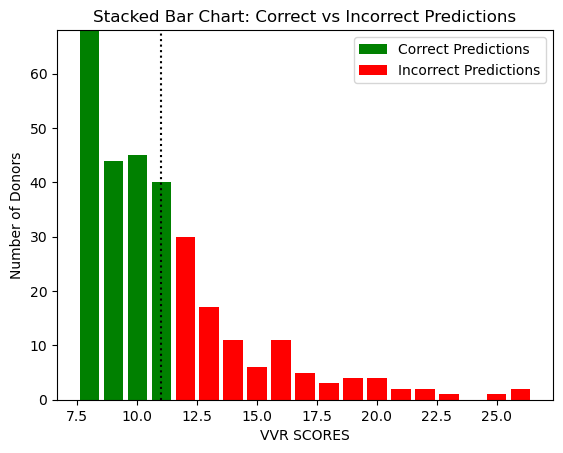

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have 'y_true' as a pandas Series with index matching participant IDs
# Assuming you have 'self_reported_df' as a DataFrame containing self-reported data
# Assuming you have 'X' as a DataFrame or array with the same index as y_true

# Remove duplicates from the 'ID' column in 'self_reported_df'
self_reported_df.drop_duplicates(subset='ID', inplace=True)

# Define the threshold for the binary classification
threshold = 11

# Set the index of 'X' to match the index of 'y_true'
X = X.set_index(y.index)

# Assuming you have already made predictions on the whole dataset using Random Forest classifier
predictions_rf = rf_clf.predict(X)

# Create a new Series with the predictions, using the same index as y_true
predictions_series = pd.Series(predictions_rf, index=y.index, name='Prediction')

# Merge 'self_reported_df' with the predictions Series based on the 'ID' column
merged_df = pd.merge(self_reported_df, predictions_series, left_on='ID', right_index=True, how='inner')

# Calculate the counts of correct and incorrect predictions for each VVR score
vvr_scores = merged_df['sum'].unique()
correct_counts = []
incorrect_counts = []

for vvr_score in vvr_scores:
    df_subset = merged_df[merged_df['sum'] == vvr_score]
    correct_count = len(df_subset[df_subset['Prediction'] == df_subset['At_Risk']])
    incorrect_count = len(df_subset) - correct_count
    correct_counts.append(correct_count)
    incorrect_counts.append(incorrect_count)

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the stacked bars for correct predictions
ax.bar(vvr_scores, correct_counts, color='b', label='Correct Predictions')

# Plot the stacked bars for incorrect predictions on top of correct predictions
ax.bar(vvr_scores, incorrect_counts, bottom=correct_counts, color='red', label='Incorrect Predictions')

# Add a dotted line at x-axis value 11
ax.axvline(x=11, color='black', linestyle='dotted')

# Set the labels and title of the plot
ax.set_xlabel('VVR SCORES')
ax.set_ylabel('Number of Donors')
ax.set_title('Stacked Bar Chart: Correct vs Incorrect Predictions')

# Add a legend
ax.legend()

# Show the plot
plt.show()


C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


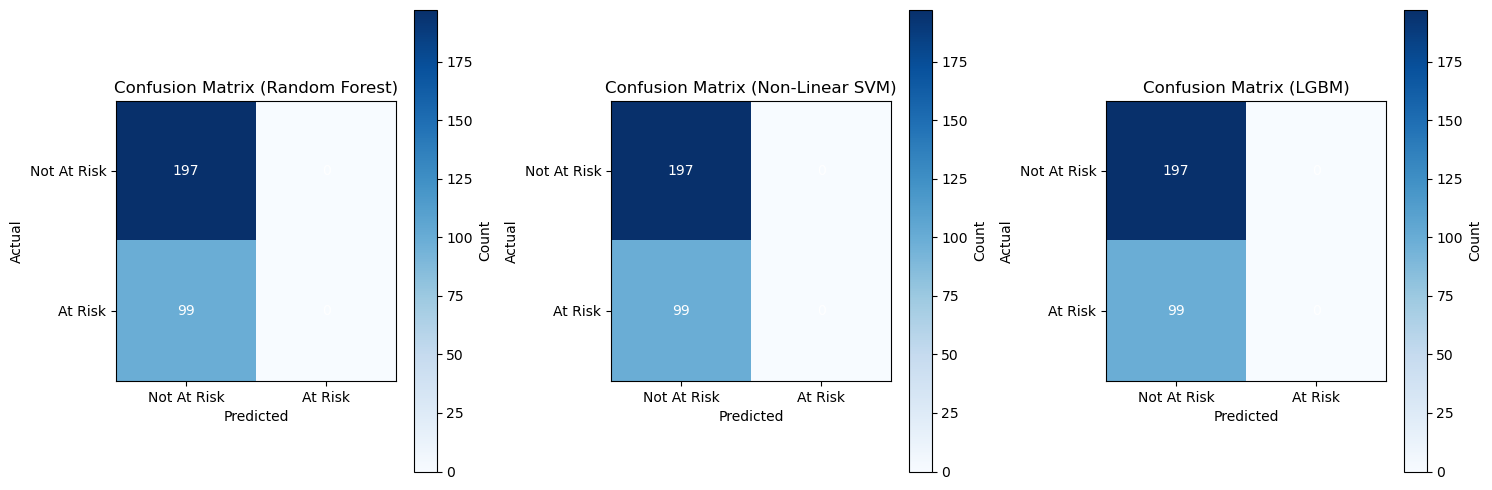

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have 'y_true' as a pandas Series with index matching participant IDs
# Assuming you have 'self_reported_df' as a DataFrame containing self-reported data
# Assuming you have 'X' as a DataFrame or array with the same index as y_true

# Remove duplicates from the 'ID' column in 'self_reported_df'
self_reported_df.drop_duplicates(subset='ID', inplace=True)

# Define the threshold for the binary classification
threshold = 11

# Set the index of 'X' to match the index of 'y_true'
X = X.set_index(y.index)

# Assuming you have already made predictions on the whole dataset using different classifiers
predictions_rf = rf_clf.predict(X)
predictions_non_linear_svm = svm_clf.predict(X)
predictions_lgbm = lgbm_clf.predict(X)

# Create a new Series with the predictions, using the same index as y_true
predictions_rf_series = pd.Series(predictions_rf, index=y.index, name='Prediction_RF')
predictions_non_linear_svm_series = pd.Series(predictions_non_linear_svm, index=y.index, name='Prediction_Non_Linear_SVM')
predictions_lgbm_series = pd.Series(predictions_lgbm, index=y.index, name='Prediction_LGBM')

# Merge 'self_reported_df' with the predictions Series based on the 'ID' column for each classifier
merged_df_rf = pd.merge(self_reported_df, predictions_rf_series, left_on='ID', right_index=True, how='inner')
merged_df_non_linear_svm = pd.merge(self_reported_df, predictions_non_linear_svm_series, left_on='ID', right_index=True, how='inner')
merged_df_lgbm = pd.merge(self_reported_df, predictions_lgbm_series, left_on='ID', right_index=True, how='inner')

# Calculate the confusion matrices for each classifier
conf_matrix_rf = confusion_matrix(merged_df_rf['At_Risk'], merged_df_rf['Prediction_RF'])
conf_matrix_non_linear_svm = confusion_matrix(merged_df_non_linear_svm['At_Risk'], merged_df_non_linear_svm['Prediction_Non_Linear_SVM'])
conf_matrix_lgbm = confusion_matrix(merged_df_lgbm['At_Risk'], merged_df_lgbm['Prediction_LGBM'])

# Create a figure and axis for the plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the confusion matrix for Random Forest classifier
im_rf = axes[0].imshow(conf_matrix_rf, cmap='Blues')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix (Random Forest)')
tick_labels = ['Not At Risk', 'At Risk']
axes[0].set_xticks(np.arange(len(tick_labels)))
axes[0].set_yticks(np.arange(len(tick_labels)))
axes[0].set_xticklabels(tick_labels)
axes[0].set_yticklabels(tick_labels)
for i in range(len(tick_labels)):
    for j in range(len(tick_labels)):
        axes[0].text(j, i, str(conf_matrix_rf[i, j]), ha='center', va='center', color='w')

# Plot the confusion matrix for Non-Linear SVM classifier
im_non_linear_svm = axes[1].imshow(conf_matrix_non_linear_svm, cmap='Blues')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix (Non-Linear SVM)')
tick_labels = ['Not At Risk', 'At Risk']
axes[1].set_xticks(np.arange(len(tick_labels)))
axes[1].set_yticks(np.arange(len(tick_labels)))
axes[1].set_xticklabels(tick_labels)
axes[1].set_yticklabels(tick_labels)
for i in range(len(tick_labels)):
    for j in range(len(tick_labels)):
        axes[1].text(j, i, str(conf_matrix_non_linear_svm[i, j]), ha='center', va='center', color='w')

# Plot the confusion matrix for LGBM classifier
im_lgbm = axes[2].imshow(conf_matrix_lgbm, cmap='Blues')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_title('Confusion Matrix (LGBM)')
tick_labels = ['Not At Risk', 'At Risk']
axes[2].set_xticks(np.arange(len(tick_labels)))
axes[2].set_yticks(np.arange(len(tick_labels)))
axes[2].set_xticklabels(tick_labels)
axes[2].set_yticklabels(tick_labels)
for i in range(len(tick_labels)):
    for j in range(len(tick_labels)):
        axes[2].text(j, i, str(conf_matrix_lgbm[i, j]), ha='center', va='center', color='w')

# Add colorbars to the plots
cbar_rf = fig.colorbar(im_rf, ax=axes[0])
cbar_rf.set_label('Count')
cbar_non_linear_svm = fig.colorbar(im_non_linear_svm, ax=axes[1])
cbar_non_linear_svm.set_label('Count')
cbar_lgbm = fig.colorbar(im_lgbm, ax=axes[2])
cbar_lgbm.set_label('Count')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()



C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


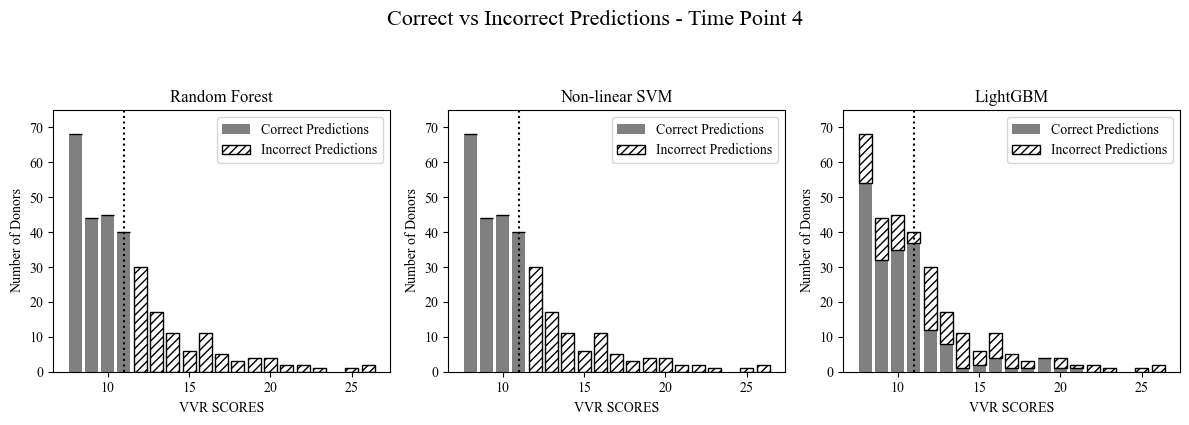

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'y_true' as a pandas Series with index matching participant IDs
# Assuming you have 'self_reported_df' as a DataFrame containing self-reported data
# Assuming you have 'X' as a DataFrame or array with the same index as y_true

# Remove duplicates from the 'ID' column in 'self_reported_df'
self_reported_df.drop_duplicates(subset='ID', inplace=True)

# Define the threshold for the binary classification
threshold = 11

# Set the index of 'X' to match the index of 'y_true'
X = X.set_index(y.index)

predictions_rf = rf_clf.predict(X)
predictions_non_linear_svm = svm_clf.predict(X)
predictions_lgbm = lgbm_clf.predict(X)

# Define the prediction variables
prediction_variables = ['predictions_rf', 'predictions_non_linear_svm', 'predictions_lgbm']

# Create a figure and axes for the subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # Adjust the figure size as per your requirement

# Iterate over the prediction variables
for i, variable in enumerate(prediction_variables):
    # Get the predictions for the current variable
    predictions = globals()[variable]
    plt.rcParams['font.family'] = 'Times New Roman'
    # Create a new Series with the predictions, using the same index as y_true
    predictions_series = pd.Series(predictions, index=y.index, name='Prediction')

    # Merge 'self_reported_df' with the predictions Series based on the 'ID' column
    merged_df = pd.merge(self_reported_df, predictions_series, left_on='ID', right_index=True, how='inner')

    # Calculate the counts of correct and incorrect predictions for each VVR score
    vvr_scores = merged_df['sum'].unique()
    correct_counts = []
    incorrect_counts = []

    for vvr_score in vvr_scores:
        df_subset = merged_df[merged_df['sum'] == vvr_score]
        correct_count = len(df_subset[df_subset['Prediction'] == df_subset['At_Risk']])
        incorrect_count = len(df_subset) - correct_count
        correct_counts.append(correct_count)
        incorrect_counts.append(incorrect_count)

    # Plot the stacked bars for correct predictions with solid filling
    axs[i].bar(vvr_scores, correct_counts, color='gray', label='Correct Predictions', hatch='')

    # Plot the stacked bars for incorrect predictions on top of correct predictions with dotted filling
    axs[i].bar(vvr_scores, incorrect_counts, bottom=correct_counts, color='white', edgecolor='black',
               label='Incorrect Predictions', hatch='////')

    # Add a dotted line at x-axis value 11
    axs[i].axvline(x=11, color='black', linestyle='dotted')
    
    # Determine the title based on the prediction variable
    if variable == 'predictions_rf':
        title = 'Random Forest'
    elif variable == 'predictions_non_linear_svm':
        title = 'Non-linear SVM'
    elif variable == 'predictions_lgbm':
        title = 'LightGBM'
    # Set the labels and title of the plot
    axs[i].set_xlabel('VVR SCORES')
    axs[i].set_ylabel('Number of Donors')
    axs[i].set_title(f'{title}')
    axs[i].set_ylim(top=75)
    # Add a legend
    axs[i].legend()

# Adjust the spacing between subplots
plt.tight_layout()
# Add a big title for the whole figure
fig.suptitle('Correct vs Incorrect Predictions - Time Point 4', fontsize=16, y=1.05)
plt.subplots_adjust(top=0.8)  # Adjust the top parameter to leave space for the super title
plt.rcParams['font.family'] = 'Times New Roman'
# Save the plot as a JPEG image
plt.savefig('prediction_plot_timepoint4.jpeg', format='jpeg')
# Show the plot
plt.show()


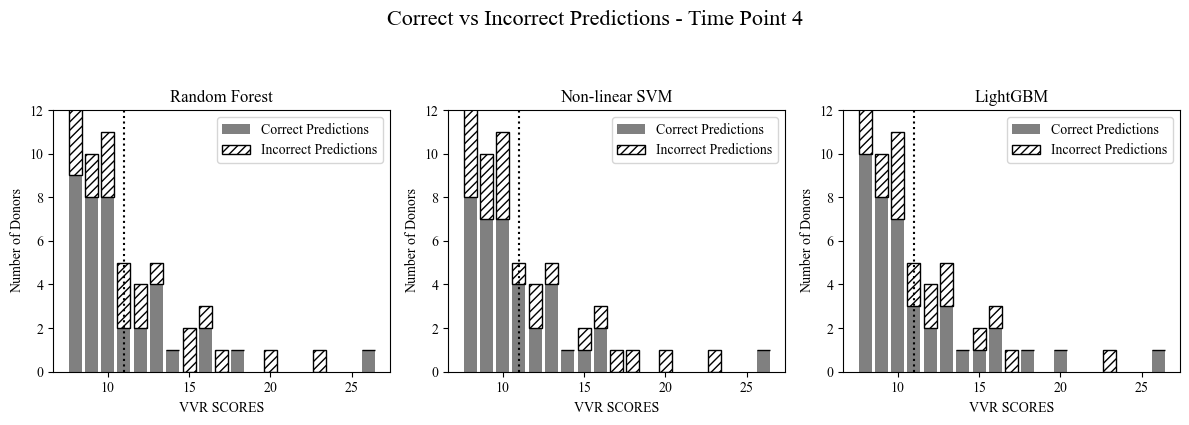

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'y_true' as a pandas Series with index matching participant IDs
# Assuming you have 'self_reported_df' as a DataFrame containing self-reported data
# Assuming you have 'X' as a DataFrame or array with the same index as y_true

# Remove duplicates from the 'ID' column in 'self_reported_df'
self_reported_df.drop_duplicates(subset='ID', inplace=True)

# Define the threshold for the binary classification
threshold = 11

# Convert 'X_test_std' array to a DataFrame
X_test_std = pd.DataFrame(X_test_std, index=y_test.index)

predictions_rf = rf_clf.predict(X_test_std)
predictions_non_linear_svm = svm_clf.predict(X_test_std)
predictions_lgbm = lgbm_clf.predict(X_test_std)

# Define the prediction variables
prediction_variables = ['predictions_rf', 'predictions_non_linear_svm', 'predictions_lgbm']

# Create a figure and axes for the subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # Adjust the figure size as per your requirement

# Iterate over the prediction variables
for i, variable in enumerate(prediction_variables):
    # Get the predictions for the current variable
    predictions = globals()[variable]
    plt.rcParams['font.family'] = 'Times New Roman'
    # Create a new Series with the predictions, using the same index as y_true
    predictions_series = pd.Series(predictions, index=y_test.index, name='Prediction')

    # Merge 'self_reported_df' with the predictions Series based on the 'ID' column
    merged_df = pd.merge(self_reported_df, predictions_series, left_on='ID', right_index=True, how='inner')

    # Calculate the counts of correct and incorrect predictions for each VVR score
    vvr_scores = merged_df['sum'].unique()
    correct_counts = []
    incorrect_counts = []

    for vvr_score in vvr_scores:
        df_subset = merged_df[merged_df['sum'] == vvr_score]
        correct_count = len(df_subset[df_subset['Prediction'] == df_subset['At_Risk']])
        incorrect_count = len(df_subset) - correct_count
        correct_counts.append(correct_count)
        incorrect_counts.append(incorrect_count)

    # Plot the stacked bars for correct predictions with solid filling
    axs[i].bar(vvr_scores, correct_counts, color='gray', label='Correct Predictions', hatch='')

    # Plot the stacked bars for incorrect predictions on top of correct predictions with dotted filling
    axs[i].bar(vvr_scores, incorrect_counts, bottom=correct_counts, color='white', edgecolor='black',
               label='Incorrect Predictions', hatch='////')

    # Add a dotted line at x-axis value 11
    axs[i].axvline(x=11, color='black', linestyle='dotted')
    
    # Determine the title based on the prediction variable
    if variable == 'predictions_rf':
        title = 'Random Forest'
    elif variable == 'predictions_non_linear_svm':
        title = 'Non-linear SVM'
    elif variable == 'predictions_lgbm':
        title = 'LightGBM'
    # Set the labels and title of the plot
    axs[i].set_xlabel('VVR SCORES')
    axs[i].set_ylabel('Number of Donors')
    axs[i].set_title(f'{title}')
    axs[i].set_ylim(top=12)
    # Add a legend
    axs[i].legend()

# Adjust the spacing between subplots
plt.tight_layout()
# Add a big title for the whole figure
fig.suptitle('Correct vs Incorrect Predictions - Time Point 4', fontsize=16, y=1.05)
plt.subplots_adjust(top=0.8)  # Adjust the top parameter to leave space for the super title
plt.rcParams['font.family'] = 'Times New Roman'
# Save the plot as a JPEG image
plt.savefig('prediction_plot_timepoint4_test_set.jpeg', format='jpeg')
# Show the plot
plt.show()


In [147]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont

# Load the saved JPEG image using PIL
image = Image.open('prediction_plot_timepoint4.jpeg')

# Create a draw object
draw = ImageDraw.Draw(image)

# Specify the font style and size for the super title
font_path = "times.ttf"  # Replace with the path to your "Times New Roman" font file
font_size = 28
font = ImageFont.truetype(font_path, font_size)

# Specify the position and text for the super title
title_text = 'Correct vs Incorrect Predictions - Time Point 4'
title_width, title_height = draw.textsize(title_text, font=font)
image_width, image_height = image.size
title_position = ((image_width - title_width) // 2, 30)

# Add the super title as text overlay on the image
draw.text(title_position, title_text, font=font, fill='black')

# Save the updated image with the super title
image.save('prediction_plot_timepoint4_with_title.jpeg')


C:\Users\jmusiato\AppData\Local\Temp\ipykernel_9568\3827806512.py:17: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  title_width, title_height = draw.textsize(title_text, font=font)


In [91]:

# Assuming you have a dataframe 'X' with the features and 'y' with the target variable
model_rf = RandomForestClassifier(bootstrap = True, max_depth = 10, n_estimators = 100)
model_rf.fit(X_filtered, y)

sorted_indices_rf = importance_scores_rf.argsort()[::-1]
sorted_feature_names_rf = df_rf['Feature'].iloc[sorted_indices_rf]
sorted_importance_scores_rf = importance_scores_rf[sorted_indices_rf]

# Create a dataframe with the sorted feature names and importance scores
df_sorted_rf = pd.DataFrame({'Feature': sorted_feature_names_rf, 'Importance Score': sorted_importance_scores_rf})
df_sorted_rf

,Feature,Importance Score
18,"AU04_r__fft_coefficient__attr_""angle""__coeff_59",0.052904
45,"AU15_r__fft_coefficient__attr_""abs""__coeff_31",0.046930
23,"AU15_r__fft_coefficient__attr_""abs""__coeff_38",0.043258
43,"AU07_r__fft_coefficient__attr_""angle""__coeff_83",0.041899
7,"AU14_r__fft_coefficient__attr_""abs""__coeff_91",0.033044
39,"AU14_r__fft_coefficient__attr_""abs""__coeff_76",0.028216
10,"AU14_r__fft_coefficient__attr_""abs""__coeff_97",0.027979
32,"AU14_r__fft_coefficient__attr_""abs""__coeff_62",0.027500
31,"AU15_r__fft_coefficient__attr_""abs""__coeff_45",0.027064
40,"AU14_r__fft_coefficient__attr_""abs""__coeff_74",0.026410


In [117]:
# Filter the dataframe to include only the top ten features for the specific Action Unit points
top_features_au07 = df_sorted_rf[df_sorted_rf['Feature'].str.contains('AU07')]
top_features_au15 = df_sorted_rf[df_sorted_rf['Feature'].str.contains('AU15')]
top_features_au14 = df_sorted_rf[df_sorted_rf['Feature'].str.contains('AU14')]
top_features_au04 = df_sorted_rf[df_sorted_rf['Feature'].str.contains('AU04')]

# Calculate the count of features for each Action Unit point
count_au07 = top_features_au07.shape[0]
count_au15 = top_features_au15.shape[0]
count_au14 = top_features_au14.shape[0]
count_au04 = top_features_au04.shape[0]
# Sum the importance scores for each Action Unit point
sum_score_au07 = top_features_au07['Importance Score'].sum()
sum_score_au15 = top_features_au15['Importance Score'].sum()
sum_score_au14 = top_features_au14['Importance Score'].sum()
sum_score_au04 = top_features_au04['Importance Score'].sum()

# Create a new dataframe to store the summarized importance scores
summary_df = pd.DataFrame({
    'Action Unit Point': ['AU07', 'AU15', 'AU14', 'AU04'],
    'Summed Importance Score': [sum_score_au07, sum_score_au15, sum_score_au14, sum_score_au04], 
    'Count': [count_au07, count_au15, count_au14, count_au04]
})

# Display the summary dataframe
summary_df


,Action Unit Point,Summed Importance Score,Count
0,AU07,0.041899,1
1,AU15,0.117252,3
2,AU14,0.787945,49
3,AU04,0.052904,1


In [109]:
# Assuming you have a dataframe 'X_filtered' with the features and 'y' with the target variable
model_svm = SVC(kernel='rbf', C=10, coef0=0.0, degree=2, gamma='scale')  # Non-linear SVM with RBF kernel
model_svm.fit(X_filtered, y)


from sklearn.inspection import permutation_importance



# Compute permutation importance
result = permutation_importance(model_svm, X_filtered, y, n_repeats=10, random_state=42)

# Get the feature importance scores
importance_scores_svm = result.importances_mean

# Sort the feature importance scores in descending order
sorted_indices_svm = importance_scores_svm.argsort()[::-1]
sorted_feature_names_svm = X_filtered.columns[sorted_indices_svm]
sorted_importance_scores_svm = importance_scores_svm[sorted_indices_svm]

# Create a dataframe with the sorted feature names and importance scores
df_sorted_svm = pd.DataFrame({'Feature': sorted_feature_names_svm, 'Importance Score': sorted_importance_scores_svm})


In [118]:
# Filter the dataframe to include only the top ten features for the specific Action Unit points
top_features_au07 = df_sorted_svm[df_sorted_svm['Feature'].str.contains('AU07')]
top_features_au15 = df_sorted_svm[df_sorted_svm['Feature'].str.contains('AU15')]
top_features_au14 = df_sorted_svm[df_sorted_svm['Feature'].str.contains('AU14')]
top_features_au04 = df_sorted_svm[df_sorted_svm['Feature'].str.contains('AU04')]

# Calculate the count of features for each Action Unit point
count_au07 = top_features_au07.shape[0]
count_au15 = top_features_au15.shape[0]
count_au14 = top_features_au14.shape[0]
count_au04 = top_features_au04.shape[0]
# Sum the importance scores for each Action Unit point
sum_score_au07 = top_features_au07['Importance Score'].sum()
sum_score_au15 = top_features_au15['Importance Score'].sum()
sum_score_au14 = top_features_au14['Importance Score'].sum()
sum_score_au04 = top_features_au04['Importance Score'].sum()

# Create a new dataframe to store the summarized importance scores
summary_df = pd.DataFrame({
    'Action Unit Point': ['AU07', 'AU15', 'AU14', 'AU04'],
    'Summed Importance Score': [sum_score_au07, sum_score_au15, sum_score_au14, sum_score_au04], 
    'Count': [count_au07, count_au15, count_au14, count_au04]
})

# Display the summary dataframe
summary_df

,Action Unit Point,Summed Importance Score,Count
0,AU07,0.043581,1
1,AU15,-0.005068,3
2,AU14,0.004730,49
3,AU04,0.039865,1


In [128]:
import lightgbm as lgb
import pandas as pd
import re

# Remove special characters from feature names
def remove_special_characters(feature_names):
    pattern = r'[^a-zA-Z0-9_]'  # Regex pattern to match non-alphanumeric and non-underscore characters
    return [re.sub(pattern, '', name) for name in feature_names]

# Preprocess feature names
preprocessed_feature_names = remove_special_characters(X_filtered.columns)

# Update feature names in X_filtered
X_filtered.columns = preprocessed_feature_names

# Assuming you have a dataframe 'X' with the features and 'y' with the target variable
model_lgb = lgb.LGBMClassifier(learning_rate=0.5, max_depth=10, n_estimators=100, num_leaves=31)
model_lgb.fit(X_filtered, y)

# Calculate the feature importance scores
importance_scores_lgb = model_lgb.feature_importances_

# Normalize the importance scores
normalized_importance_scores_lgb = importance_scores_lgb / importance_scores_lgb.sum()

# Sort the feature importance scores in descending order
sorted_indices_lgb = normalized_importance_scores_lgb.argsort()[::-1]
sorted_feature_names_lgb = X_filtered.columns[sorted_indices_lgb]
sorted_importance_scores_lgb = normalized_importance_scores_lgb[sorted_indices_lgb]

# Create a dataframe with the sorted feature names and importance scores
df_sorted_lgb = pd.DataFrame({'Feature': sorted_feature_names_lgb, 'Importance Score': sorted_importance_scores_lgb})



In [130]:
# Filter the dataframe to include only the top ten features for the specific Action Unit points
top_features_au07 = df_sorted_lgb[df_sorted_lgb['Feature'].str.contains('AU07')]
top_features_au15 = df_sorted_lgb[df_sorted_lgb['Feature'].str.contains('AU15')]
top_features_au14 = df_sorted_lgb[df_sorted_lgb['Feature'].str.contains('AU14')]
top_features_au04 = df_sorted_lgb[df_sorted_lgb['Feature'].str.contains('AU04')]

# Calculate the count of features for each Action Unit point
count_au07 = top_features_au07.shape[0]
count_au15 = top_features_au15.shape[0]
count_au14 = top_features_au14.shape[0]
count_au04 = top_features_au04.shape[0]
# Sum the importance scores for each Action Unit point
sum_score_au07 = top_features_au07['Importance Score'].sum()
sum_score_au15 = top_features_au15['Importance Score'].sum()
sum_score_au14 = top_features_au14['Importance Score'].sum()
sum_score_au04 = top_features_au04['Importance Score'].sum()

# Create a new dataframe to store the summarized importance scores
summary_df = pd.DataFrame({
    'Action Unit Point': ['AU07', 'AU15', 'AU14', 'AU04'],
    'Summed Importance Score': [sum_score_au07, sum_score_au15, sum_score_au14, sum_score_au04], 
    'Count': [count_au07, count_au15, count_au14, count_au04]
})

# Display the summary dataframe
summary_df

,Action Unit Point,Summed Importance Score,Count
0,AU07,0.063388,1
1,AU15,0.177049,3
2,AU14,0.684153,49
3,AU04,0.075410,1


In [84]:
# Extract the top 20 important features
top_features = sorted_feature_names_rf[:20]

# Create a new dataframe 'X_important' with only the top 20 important features
X_important = X[top_features].copy()

In [87]:

# Separating features and target variable
X = X_important
#X = X_top
y = y




# Splitting data into training, validation, and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42, stratify=y_trainval)

# Standardizing data
#Try Min-Max Normalization
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

# Handling data imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_std, y_train)

#Try to use F1 instead or precision recall score 
scoring = make_scorer(recall_score)

#Try RF without standardization, it can yield different results
# Random Forest Classifier with grid search cross-validation
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [50, 100, 200,500],
                 'max_depth': [5, 10, 20, None],
                 'bootstrap': [True, False]}
rf_gs = GridSearchCV(rf, param_grid_rf, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring=scoring)
rf_gs.fit(X_train_smote, y_train_smote)
print("Random Forest Classifier Best Parameters: ", rf_gs.best_params_)

# Non-Linear SVM Classifier with grid search cross-validation
svm = SVC(kernel='rbf', random_state=42)
param_grid_svm = {'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.1, 1, 10],
        'coef0': [0.0, 0.5, 1.0],
        'degree': [2, 3, 4]}
svm_gs = GridSearchCV(svm, param_grid_svm, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring=scoring)
svm_gs.fit(X_train_smote, y_train_smote)
print("Non-Linear SVM Classifier Best Parameters: ", svm_gs.best_params_)

# Linear SVM Classifier with grid search cross-validation
linear_svm = LinearSVC(random_state=42)
param_grid_linear_svm = {'C': [0.1, 1, 10],
        'loss': ['hinge', 'squared_hinge']}
linear_svm_gs = GridSearchCV(linear_svm, param_grid_linear_svm, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring=scoring)
linear_svm_gs.fit(X_train_smote, y_train_smote)
print("Linear SVM Classifier Best Parameters: ", linear_svm_gs.best_params_)



# LightGBM Classifier with grid search cross-validation
lgbm_clf = lgbm.LGBMClassifier(random_state=42)
param_grid_lgbm = {'n_estimators': [50, 100, 200],
                   'max_depth': [5, 10, 20, None],
                   'learning_rate': [0.01, 0.1, 0.5],
                   'num_leaves': [31, 50, 100, 200]}
lgbm_gs = GridSearchCV(lgbm_clf, param_grid_lgbm, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring=scoring)
lgbm_gs.fit(X_train_smote, y_train_smote)
print("LightGBM Classifier Best Parameters: ", lgbm_gs.best_params_)

# Making predictions on validation data using best hyperparameters
y_pred_rf = rf_gs.predict(X_val_std)
y_pred_svm = svm_gs.predict(X_val_std)
y_pred_lgbm = lgbm_gs.predict(X_val_std)
y_pred_linear_svm = linear_svm_gs.predict(X_val_std)

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=rf_gs.best_params_['n_estimators'], max_depth=rf_gs.best_params_['max_depth'],
                             bootstrap =rf_gs.best_params_['bootstrap'], random_state=42)
rf_clf.fit(X_train_smote, y_train_smote)

# Non-Linear SVM Classifier
svm_clf = SVC(C=svm_gs.best_params_['C'], gamma=svm_gs.best_params_['gamma'],coef0=svm_gs.best_params_['coef0'], degree=svm_gs.best_params_['degree'],
              kernel='rbf', random_state=42)
svm_clf.fit(X_train_smote, y_train_smote)

#Linear SVM Classifier
linear_svm_clf = LinearSVC(C=linear_svm_gs.best_params_['C'], loss=linear_svm_gs.best_params_['loss'],
               random_state=42)
linear_svm_clf.fit(X_train_smote, y_train_smote)

# LightGBM Classifier
lgbm_clf = lgbm.LGBMClassifier(n_estimators=lgbm_gs.best_params_['n_estimators'], max_depth=lgbm_gs.best_params_['max_depth'], 
                               learning_rate =lgbm_gs.best_params_['learning_rate'], num_leaves =lgbm_gs.best_params_['num_leaves'],   random_state=42)
lgbm_clf.fit(X_train_smote, y_train_smote)



Random Forest Classifier Best Parameters:  {'bootstrap': True, 'max_depth': 5, 'n_estimators': 50}
Non-Linear SVM Classifier Best Parameters:  {'C': 10, 'coef0': 0.0, 'degree': 2, 'gamma': 0.1}


C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-pack

Linear SVM Classifier Best Parameters:  {'C': 0.1, 'loss': 'hinge'}
LightGBM Classifier Best Parameters:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 31}


LGBMClassifier(max_depth=10, n_estimators=200, random_state=42)

In [148]:
from sklearn.metrics import confusion_matrix

# Obtain the predicted labels for each approach
predictions_rf = rf_clf.predict(X)
predictions_non_linear_svm = svm_clf.predict(X)
predictions_lgbm = lgbm_clf.predict(X)

# Create confusion matrices for each approach
cm_rf = confusion_matrix(y, predictions_rf)
cm_non_linear_svm = confusion_matrix(y, predictions_non_linear_svm)
cm_lgbm = confusion_matrix(y, predictions_lgbm)

# Print the confusion matrices
print("Confusion Matrix - Random Forest:")
print(cm_rf)

print("\nConfusion Matrix - Non-linear SVM:")
print(cm_non_linear_svm)

print("\nConfusion Matrix - LightGBM:")
print(cm_lgbm)


Confusion Matrix - Random Forest:
[[197   0]
 [ 99   0]]

Confusion Matrix - Non-linear SVM:
[[197   0]
 [ 99   0]]

Confusion Matrix - LightGBM:
[[158  39]
 [ 64  35]]


C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\jmusiato\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


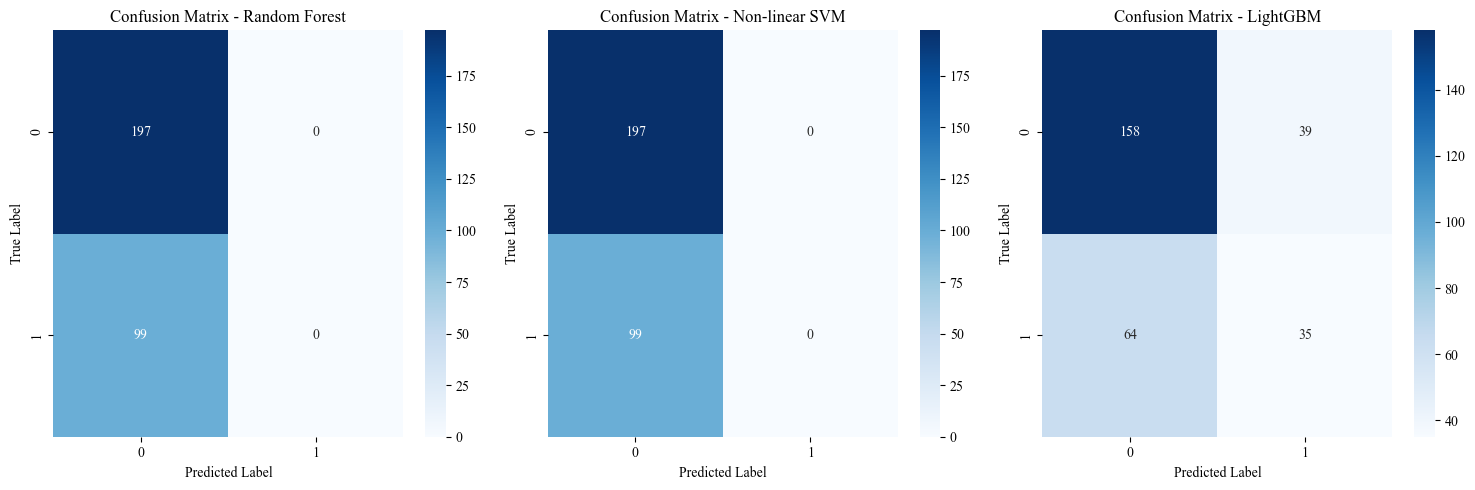

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of approach names
approaches = ['Random Forest', 'Non-linear SVM', 'LightGBM']

# Create a list of confusion matrices
confusion_matrices = [cm_rf, cm_non_linear_svm, cm_lgbm]

# Create subplots for each approach
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over the approaches and confusion matrices
for i, (approach, cm) in enumerate(zip(approaches, confusion_matrices)):
    # Create a heatmap for the current confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {approach}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
